# FORESEE - Two Higgs Doublet Model (2HDM)

**Clone(FORESEE Models: Dark Higgs)**

**Structure Redone For Point-By-Point**

## Load Libraries 

In [1]:
import numpy as np
import sys
import os
src_path = "../../"
sys.path.append(src_path)
#from src.foresee import Foresee, Utility, Model #
from src.foresee_pbp import Foresee, Utility, Model
from matplotlib import pyplot as plt
import time
import warnings
import csv

In [2]:
if False: warnings.filterwarnings('once')

## 1. Specifying the Model

The phenomenology of the 2HDM, both cp-even $H$ and cp-odd $A$ non-SM Higgs can be the light long-lived scalar.


In [3]:
energy = "13.6"
# modelname = "2HDM"
modelname="NMSSM"
confignum="F2Dwintest2_0-9" #011y send coupling=1,acomp=1 for the llp spectrum, then in get events send correct vals, incorporate acomp into get production scaling therefore want an Acomp_ref (default as 1)onfiguration_subtitle=""
configuration_subtitle = "?"
# now currently using 011y to just test mhpm AND acomp integration using just the 5 -5 modes (since unsure how to best integrate into s-dA formula and the mixing ones)
# z direct copy of y --> 011z currently each pt up to 1 GeV, every 50 up to 3
#"2HDM" for weis data
#"F2DO1" for FORESEE2D first test
#"F2DO2" for FORESEE2Dv2 , more fixed params
configuration=f"{modelname}_{confignum}"
model = Model(modelname, path="./")

**Production** The A  is mainly produced in 

\begin{equation}
\sigma(A) = O_{A\pi}^2 \sigma(\pi^0) +O_{A\eta}^2 \sigma(\eta)+O_{A\eta'}^2 \sigma(\eta')
\end{equation}

In addition, the scalar can also be produced in weak decays of SM mesons, in particular $K \to \pi A$ and $B \to X_s A$.

the flavour changing 2-body decay of $b$-quarks $b \to X_s \phi$. This process includes all b-flavoured hadrons and all strange-flavored decay products. For this we need to specify the total branching fraction into the LLP as function of the `coupling` and the `mass`. 

\begin{equation}
\Gamma(B\to X_s A) = 2 \Gamma_0\, \frac{m_b^3}{m_B^3}
  \bigg(1-\frac{m_{A}^2}{m_b^2}\bigg)\,. \\
\end{equation}

\begin{equation}
\Gamma_0 = \frac{G_F^3 |V_{ts}^* V_{tb}|^2}{\sqrt2\, 2^{8}\, \pi^5}\, m_t^4\,
  m_B^3 \big(X_1\cot\beta + X_2\cot^3\beta\big)^2 ,
\end{equation}


\begin{equation}
\begin{aligned}
X_{1}\left(m, m_{H^\pm}, m_{\mathrm{w}}\right)=&\left(\frac{m_{\mathrm{w}}^{2}-\frac{1}{2} m^{2}}{m_{\mathrm{w}}^{2}-m^{2}}\right)\left(\frac{m_{\mathrm{w}}^{2}}{m_{\mathrm{w}}^{2}-m^{2}} \ln \left(\frac{m_{\mathrm{w}}^{2}}{m^{2}}\right)-1\right) \\
&+\frac{2 m_{\mathrm{w}}^{2}}{m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}}\left(\frac{m_{H^\pm}^{2}}{m_{H^\pm}^{2}-m^{2}} \ln \left(\frac{m_{H^\pm}^{2}}{m^{2}}\right)-\frac{m_{\mathrm{w}}^{2}}{m_{\mathrm{w}}^{2}-m^{2}} \ln \left(\frac{m_{\mathrm{w}}^{2}}{m^{2}}\right)\right) \\
&+\frac{1}{2}\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)\left(\frac{-m_{H^\pm}^{2}}{\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)\left(m_{H^\pm}^{2}-m^{2}\right)}\right.\\
&+\frac{m_{\mathrm{w}}^{2} m_{H^\pm}^{2}}{\left(m_{\mathrm{w}}^{2}-m^{2}\right)\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)^{2}} \ln \left(\frac{m_{\mathrm{w}}^{2}}{m_{H^\pm}^{2}}\right) \\
&+\frac{m_{H^\pm}^{2} m^{2}}{\left(m_{\mathrm{w}}^{2}-m^{2}\right)\left(m_{H^\pm}^{2}-m^{2}\right)^{2}} \ln \left(\frac{m_{H^\pm}^{2}}{m^{2}}\right)+\frac{1}{2} \frac{m^{2}}{\left(m_{\mathrm{w}}^{2}-m^{2}\right)\left(m_{H^\pm}^{2}-m^{2}\right)} \\
&+\frac{1}{2} \frac{m_{\mathrm{w}}^{4}}{\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)\left(m_{\mathrm{w}}^{2}-m^{2}\right)^{2}} \ln \left(\frac{m_{\mathrm{w}}^{2}}{m^{2}}\right) \\
&\left.-\frac{1}{2} \frac{m_{H^\pm}^{4}}{\left(m_{\mathrm{w}}^{2}-m_{H^\pm}^{2}\right)\left(m_{H^\pm}^{2}-m^{2}\right)^{2}} \ln \left(\frac{m_{H^\pm}^{2}}{m^{2}}\right)\right),
\end{aligned}
\end{equation}

\begin{equation}
X_{2}\left(m, m_{H^\pm}, m_{\mathrm{W}}\right)=\frac{1}{2} m^{2}\left(\frac{1}{m_{H^\pm}^{2}-m^{2}}-\frac{m_{H^\pm}^{2}}{\left(m_{H^\pm}^{2}-m^{2}\right)^{2}} \ln \left(\frac{m_{H^\pm}^{2}}{m^{2}}\right)\right)
\end{equation}



More details about the Br are at draft

\begin{equation}
% \begin{aligned}
\Gamma^{K^+}_0 = \frac{G_F^3 m_{K^+}^3}{\sqrt2\, 2^{8}\, \pi^5}\Big(m_t^2\,|V_{td}^* V_{ts}|\big(X_1\cot\beta + X_2\cot^3\beta\big)+m_c^2\,|V_{cd}^* V_{cs}|\big(X_1\cot\beta + X_2\cot^3\beta\big)\Big)^2
% \end{aligned}
\end{equation}

the $K^+\to \pi^+ A$ decay rate is given by
\begin{equation}
\Gamma(K^+\to \pi^+ A) = \Gamma_0\,
  \frac{\lambda_\pi (m_{K^+}^2-m_\pi^2)^2}{m_{K^+}^6}\, \big[f^{K^+}_0(m_{A^0}^2)\big]^2 .
\end{equation}

\begin{equation}
\mathcal{M}\left(K_{L} \rightarrow \pi^{0} A\right)=-\operatorname{Re} \mathcal{M}\left(K^{+} \rightarrow \pi^{+} A\right)
\end{equation}

$\Gamma(K^+)_{\rm Total}=\frac{1}{\tau}=\frac{6.58*(10^-25)}{1.2380*10^-8}$
$\Gamma(K^0)_{\rm Total}=\frac{1}{\tau}=\frac{6.58*(10^-25)}{5.116*10^-8}$




**BELOW**

Adding production BR formulae incorporating $Acomp$ and $m_{H^\pm}$

In [4]:
# b to xs A
model.add_production_2bodydecay(
    pid0 = "5",   
    pid1 = "321", #                                                     v 1/tanB = cotB            v (1/tanB)3 = cot3B
    #br = "2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*(-0.676852*1/coupling - 0.331225*pow((1/coupling),3))**2",
    br = "Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*((-0.20872192322244973 + 2*6460.462129/(6460.462129-mHpm**2)*(mHpm**2/(mHpm**2-29821.8361)*np.log(mHpm**2/29821.8361)-0.42298605543533996) + 0.5*(6460.462129-mHpm**2)*(-mHpm**2/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)-0.27654461321580626*mHpm**2/(6460.462129-mHpm**2)**2*np.log(6460.462129/mHpm**2)+mHpm**2*(-1.2765446132158063)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)-0.6382723066079031/(mHpm**2-29821.8361)-0.058487257548022836/(6460.462129-mHpm**2)-20868785.4601216/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*1/coupling - (14910.91805*(1/(mHpm**2-29821.8361)-mHpm**2/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*pow((1/coupling),3))**2)",
    # TI-2HDM times mean LLP doublet composition (square)
    generator = "Pythia8",
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
model.add_production_2bodydecay(
    pid0 = "-5",
    pid1 = "321",
    br = "Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*((-0.20872192322244973 + 2*6460.462129/(6460.462129-mHpm**2)*(mHpm**2/(mHpm**2-29821.8361)*np.log(mHpm**2/29821.8361)-0.42298605543533996) + 0.5*(6460.462129-mHpm**2)*(-mHpm**2/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)-0.27654461321580626*mHpm**2/(6460.462129-mHpm**2)**2*np.log(6460.462129/mHpm**2)+mHpm**2*(-1.2765446132158063)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)-0.6382723066079031/(mHpm**2-29821.8361)-0.058487257548022836/(6460.462129-mHpm**2)-20868785.4601216/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*1/coupling - (14910.91805*(1/(mHpm**2-29821.8361)-mHpm**2/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*pow((1/coupling),3))**2)",
    generator = "Pythia8",
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
br_b_xsA = lambda mass,coupling,Acomp,mHpm : Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*((-0.20872192322244973 + 2*6460.462129/(6460.462129-mHpm**2)*(mHpm**2/(mHpm**2-29821.8361)*np.log(mHpm**2/29821.8361)-0.42298605543533996) + 0.5*(6460.462129-mHpm**2)*(-mHpm**2/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)-0.27654461321580626*mHpm**2/(6460.462129-mHpm**2)**2*np.log(6460.462129/mHpm**2)+mHpm**2*(-1.2765446132158063)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)-0.6382723066079031/(mHpm**2-29821.8361)-0.058487257548022836/(6460.462129-mHpm**2)-20868785.4601216/(6460.462129-mHpm**2)/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*1/coupling - (14910.91805*(1/(mHpm**2-29821.8361)-mHpm**2/(mHpm**2-29821.8361)**2*np.log(mHpm**2/29821.8361)))*pow((1/coupling),3))**2)


model.add_production_2bodydecay(
    pid0 = "130",
    # KaonL
    pid1 = "111", #                                                                                 V ONLY CHANGED AFTER HERE
    # br = "Acomp*(0.00046552136954409264*np.sqrt(-0.0729*pow(mass,2)+pow(0.22938076-pow(mass,2),2))*pow(9.056720374725*(-0.3312248805170825/pow(coupling,3) - 0.6768520747465554/coupling) +  0.35811470546999996*(-0.0006280701882047425/pow(coupling,3) + 5.706106732778337/coupling),2))",
    br = "Acomp*(0.00046552136954409264*np.sqrt(-0.0729*pow(mass,2)+pow(0.22938076-pow(mass,2),2))*(0.35306213484206*((7.298454656162726 + 2*6460.783641/(6460.783641-mHpm**2)*(mHpm**2/(mHpm**2-1.6129)*np.log(mHpm**2/1.6129) - 6460.783641/(6460.783641-1.6129)*np.log(6460.783641/1.6129)) + .5*(6460.783641-mHpm**2)*(-1.6129/(6460.783641-mHpm**2)/(mHpm**2-1.6129)+6460.783641*mHpm**2/(6460.783641-1.6129)/(6460.783641-mHpm**2)**2*np.log(6460.783641/mHpm**2)+mHpm**2*1.6129/(6460.783641-1.6129)/(mHpm**2-1.6129)**2*np.log(mHpm**2/1.6129)+.5*1.6129/(6460.783641-1.6129)/(mHpm**2-1.6129)+.5*41741725.255813226/(6460.783641-mHpm**2)/(6460.783641-1.6129)**2*np.log(6460.783641/1.6129)-.5*mHpm**4/(6460.783641-mHpm**2)/(mHpm**2-1.6129)**2*np.log(mHpm**2/1.6129)))*1/coupling + (.5*1.27**2*(1/(mHpm**2-1.27**2)-mHpm**2/(mHpm**2-1.27**2)**2*np.log(mHpm**2/1.27**2))) *1/coupling**3))**2)",
    generator = "Pythia8",#['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
br_k0_piA = lambda mass,coupling,Acomp,mHpm : Acomp*(0.00046552136954409264*np.sqrt(-0.0729*pow(mass,2)+pow(0.22938076-pow(mass,2),2))*(0.35306213484206*((7.298454656162726 + 2*6460.783641/(6460.783641-mHpm**2)*(mHpm**2/(mHpm**2-1.6129)*np.log(mHpm**2/1.6129) - 6460.783641/(6460.783641-1.6129)*np.log(6460.783641/1.6129)) + .5*(6460.783641-mHpm**2)*(-1.6129/(6460.783641-mHpm**2)/(mHpm**2-1.6129)+6460.783641*mHpm**2/(6460.783641-1.6129)/(6460.783641-mHpm**2)**2*np.log(6460.783641/mHpm**2)+mHpm**2*1.6129/(6460.783641-1.6129)/(mHpm**2-1.6129)**2*np.log(mHpm**2/1.6129)+.5*1.6129/(6460.783641-1.6129)/(mHpm**2-1.6129)+.5*41741725.255813226/(6460.783641-mHpm**2)/(6460.783641-1.6129)**2*np.log(6460.783641/1.6129)-.5*mHpm**4/(6460.783641-mHpm**2)/(mHpm**2-1.6129)**2*np.log(mHpm**2/1.6129)))*1/coupling + (.5*1.27**2*(1/(mHpm**2-1.27**2)-mHpm**2/(mHpm**2-1.27**2)**2*np.log(mHpm**2/1.27**2))) *1/coupling**3))**2)

model.add_production_2bodydecay(
    pid0 = "321",
    # Kaon +
    pid1 = "211", #                                                                                     V ONLY CHANGED AFTER HERE
    # br = "Acomp*(0.00011275973750744316*np.sqrt(-0.07795264*pow(mass,2)+pow(0.22454784-pow(mass,2),2))*pow(9.056720374725*(-0.3312248805170825/pow(coupling,3) - 0.6768520747465554/coupling) +  0.35811470546999996*(-0.0006280701882047425/pow(coupling,3) + 5.706106732778337/coupling),2))",
    br = "Acomp*(0.00011275973750744316*np.sqrt(-0.07795264*pow(mass,2)+pow(0.22454784-pow(mass,2),2))*(0.35306213484206*((7.298454656162726 + 2*6460.783641/(6460.783641-mHpm**2)*(mHpm**2/(mHpm**2-1.6129)*np.log(mHpm**2/1.6129) - 6460.783641/(6460.783641-1.6129)*np.log(6460.783641/1.6129)) + .5*(6460.783641-mHpm**2)*(-1.6129/(6460.783641-mHpm**2)/(mHpm**2-1.6129)+6460.783641*mHpm**2/(6460.783641-1.6129)/(6460.783641-mHpm**2)**2*np.log(6460.783641/mHpm**2)+mHpm**2*1.6129/(6460.783641-1.6129)/(mHpm**2-1.6129)**2*np.log(mHpm**2/1.6129)+.5*1.6129/(6460.783641-1.6129)/(mHpm**2-1.6129)+.5*41741725.255813226/(6460.783641-mHpm**2)/(6460.783641-1.6129)**2*np.log(6460.783641/1.6129)-.5*mHpm**4/(6460.783641-mHpm**2)/(mHpm**2-1.6129)**2*np.log(mHpm**2/1.6129)))*1/coupling + (.5*1.27**2*(1/(mHpm**2-1.27**2)-mHpm**2/(mHpm**2-1.27**2)**2*np.log(mHpm**2/1.27**2))) *1/coupling**3))**2)",
    generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    nsample = 10,
    scaling = "manual",
)
br_kc_piA = lambda mass,coupling,Acomp,mHpm : Acomp*(0.00011275973750744316*np.sqrt(-0.07795264*pow(mass,2)+pow(0.22454784-pow(mass,2),2))*(0.35306213484206*((7.298454656162726 + 2*6460.783641/(6460.783641-mHpm**2)*(mHpm**2/(mHpm**2-1.6129)*np.log(mHpm**2/1.6129) - 6460.783641/(6460.783641-1.6129)*np.log(6460.783641/1.6129)) + .5*(6460.783641-mHpm**2)*(-1.6129/(6460.783641-mHpm**2)/(mHpm**2-1.6129)+6460.783641*mHpm**2/(6460.783641-1.6129)/(6460.783641-mHpm**2)**2*np.log(6460.783641/mHpm**2)+mHpm**2*1.6129/(6460.783641-1.6129)/(mHpm**2-1.6129)**2*np.log(mHpm**2/1.6129)+.5*1.6129/(6460.783641-1.6129)/(mHpm**2-1.6129)+.5*41741725.255813226/(6460.783641-mHpm**2)/(6460.783641-1.6129)**2*np.log(6460.783641/1.6129)-.5*mHpm**4/(6460.783641-mHpm**2)/(mHpm**2-1.6129)**2*np.log(mHpm**2/1.6129)))*1/coupling + (.5*1.27**2*(1/(mHpm**2-1.27**2)-mHpm**2/(mHpm**2-1.27**2)**2*np.log(mHpm**2/1.27**2))) *1/coupling**3))**2)

Ending production BR formulae incorporating $Acomp$ and $m_{H^\pm}$

**ABOVE**

BELOW
ADDING PRODUCTION FORMULAE FOR 3-BODY DECAY b-sAA INCLUDING VARIABLES

ENDING PRODUCTION FORMULAE FOR 3-BODY DECAY b-sAA INCLUDING VARIABLES
ABOVE

Below Productions: Two Body Decays

\begin{equation}
\sigma(A) = O_{A\pi}^2 \sigma(\pi^0) +O_{A\eta}^2 \sigma(\eta)+O_{A\eta'}^2 \sigma(\eta')
\end{equation}

The mixing coefficient $O_{Ai}$ is typically small, except in the resonance region when $m_A\sim m_i$ for $i=\pi_3, \eta,$ and $\eta^\prime$.  The approximate expressions for them are
\begin{equation}
    \begin{aligned}
        &O_{AA}\approx 1,\\
        & O_{A3}\approx\frac{\delta m_3^2}{\bar m_A^2-m_\pi^2},\\
        &O_{A\eta}\approx\frac{\cos\theta_\eta\delta m_8^2-\sin\theta_\eta\delta m_9^2}{\bar m_A^2-m_\eta^2},\\
        &O_{A\eta'}\approx\frac{\sin\theta_\eta \delta m_8^2+\cos\theta_\eta \delta m_9^2}{\bar m_A^2-m_{\eta'}^2}.
    \end{aligned}
\end{equation}
 

In [5]:
model.add_production_mixing(
    pid = "111",
    #OA3
    mixing = "Acomp*abs(2.5299704854937066e-6*(1/coupling)/((-0.018225 + 1.04506e-9j) + mass**2 + 4.26526e-9*(1/mass**2*240263*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)])+1/mass**2*162.0*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2 ))",
    generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    scaling = "manual",
)
mixing_pi = lambda mass,coupling,Acomp : Acomp*(abs(2.5299704854937066e-6*(1/coupling)/((-0.018225 + 1.04506e-9j) + mass**2 + 4.26526e-9*(1/mass**2*240263*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)])+1/mass**2*162.0*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2 )))

model.add_production_mixing(
    pid = "221",
    #eta
    mixing = "Acomp*abs((0.000104111*(1/coupling) +0.0721595*( -0.0000822417*(1/coupling)+0.0000553167*(\
    1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)))/( (-0.300304 + 7.21168e-7j) + mass**2 + 4.26526e-9*( \
        1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2))",
    generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    scaling = "manual",
)
mixing_eta = lambda mass,coupling,Acomp : Acomp*(abs((0.000104111*(1/coupling) +0.0721595*( -0.0000822417*(1/coupling)+0.0000553167*(\
    1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)))/( (-0.300304 + 7.21168e-7j) + mass**2 + 4.26526e-9*( \
        1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2)))

model.add_production_mixing(
    pid = "331",
    #etap
    mixing = "Acomp*abs((-7.53224e-6*(1/coupling) +0.997393*( -0.0000822417*(1/coupling) + 0.0000553167*(\
    1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)))/(    (-0.737881 + 0.000176632j) + mass**2 + 4.26526e-9*( \
        1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2))",
    generator = "Pythia8",# ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
    energy = energy,
    scaling = "manual",
)
mixing_etap = lambda mass,coupling,Acomp : Acomp*(abs((-7.53224e-6*(1/coupling) +0.997393*( -0.0000822417*(1/coupling) + 0.0000553167*(\
    1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
    +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)))/(    (-0.737881 + 0.000176632j) + mass**2 + 4.26526e-9*( \
        1/mass**2*240263*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(8.324207227476276e-6)), mass>np.sqrt(1/(8.324207227476276e-6))],[pow(np.arcsin(np.sqrt(8.324207227476276e-6*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2))))/(1-np.sqrt(1-1/(8.324207227476276e-6*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*162.0*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.0123457)), mass>np.sqrt(1/(0.0123457))],[pow(np.arcsin(np.sqrt(0.0123457*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.0123457*pow(mass,2))))/(1-np.sqrt(1-1/(0.0123457*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*13.005*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(0.153787)), mass>np.sqrt(1/(0.153787))],[pow(np.arcsin(np.sqrt(0.153787*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(0.153787*pow(mass,2))))/(1-np.sqrt(1-1/(0.153787*pow(mass,2)))))-1j*3.1415926535,2)]) \
        +1/mass**2*0.0693409*(1/coupling)*np.piecewise(mass+0j,[mass<=np.sqrt(1/(28.843)), mass>np.sqrt(1/(28.843))],[pow(np.arcsin(np.sqrt(28.843*pow(mass,2))),2), -0.25*pow(np.log((1+np.sqrt(1-1/(28.843*pow(mass,2))))/(1-np.sqrt(1-1/(28.843*pow(mass,2)))))-1j*3.1415926535,2)]) \
)**2)))


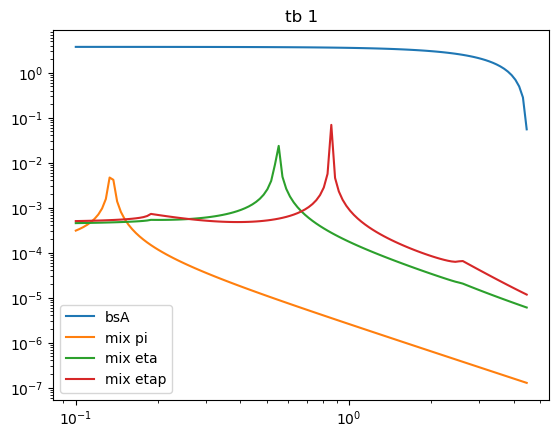

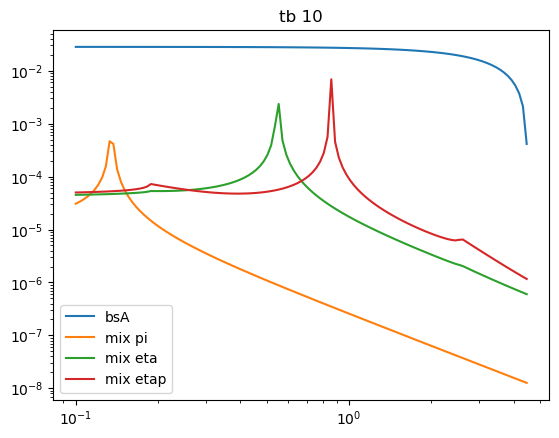

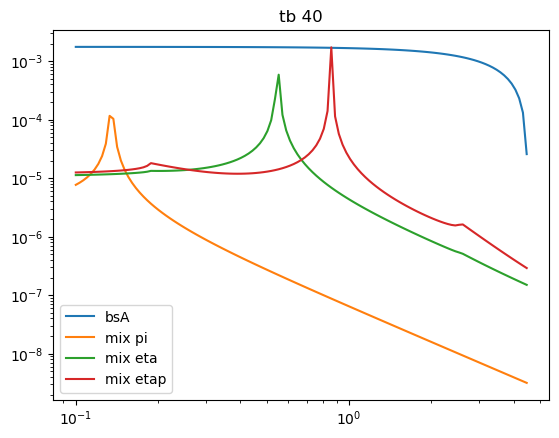

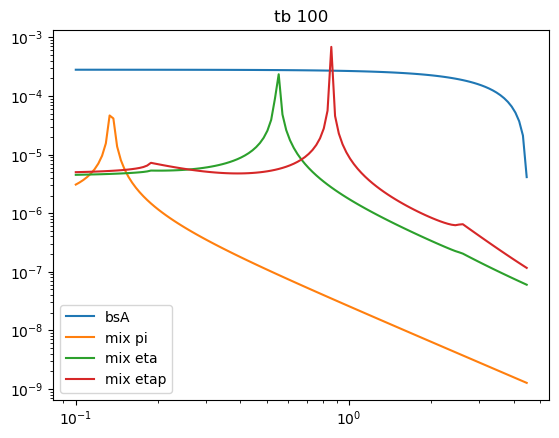

In [6]:
warnings.filterwarnings("ignore")
#br_b_xsA = lambda mass,coupling,Acomp,mHpm
plot_mlist = np.logspace(-1,.65,121)
plot_bsA_ref = [br_b_xsA(m,1,1,500) for m in plot_mlist]
plot_mix1_ref = [mixing_pi(m,1,1) for m in plot_mlist]
plot_mix2_ref = [mixing_eta(m,1,1) for m in plot_mlist]
plot_mix3_ref = [mixing_etap(m,1,1) for m in plot_mlist]
plt.plot(plot_mlist,plot_bsA_ref,label="bsA")
plt.plot(plot_mlist,plot_mix1_ref,label="mix pi")
plt.plot(plot_mlist,plot_mix2_ref,label="mix eta")
plt.plot(plot_mlist,plot_mix3_ref,label="mix etap")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.title("tb 1")
plt.show()
plot_bsA_ref = [br_b_xsA(m,10,1,500) for m in plot_mlist]
plot_mix1_ref = [mixing_pi(m,10,1) for m in plot_mlist]
plot_mix2_ref = [mixing_eta(m,10,1) for m in plot_mlist]
plot_mix3_ref = [mixing_etap(m,10,1) for m in plot_mlist]
plt.plot(plot_mlist,plot_bsA_ref,label="bsA")
plt.plot(plot_mlist,plot_mix1_ref,label="mix pi")
plt.plot(plot_mlist,plot_mix2_ref,label="mix eta")
plt.plot(plot_mlist,plot_mix3_ref,label="mix etap")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.title("tb 10")
plt.show()
plt.show()
plot_bsA_ref = [br_b_xsA(m,40,1,500) for m in plot_mlist]
plot_mix1_ref = [mixing_pi(m,40,1) for m in plot_mlist]
plot_mix2_ref = [mixing_eta(m,40,1) for m in plot_mlist]
plot_mix3_ref = [mixing_etap(m,40,1) for m in plot_mlist]
plt.plot(plot_mlist,plot_bsA_ref,label="bsA")
plt.plot(plot_mlist,plot_mix1_ref,label="mix pi")
plt.plot(plot_mlist,plot_mix2_ref,label="mix eta")
plt.plot(plot_mlist,plot_mix3_ref,label="mix etap")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.title("tb 40")
plt.show()
plot_bsA_ref = [br_b_xsA(m,100,1,500) for m in plot_mlist]
plot_mix1_ref = [mixing_pi(m,100,1) for m in plot_mlist]
plot_mix2_ref = [mixing_eta(m,100,1) for m in plot_mlist]
plot_mix3_ref = [mixing_etap(m,100,1) for m in plot_mlist]
plt.plot(plot_mlist,plot_bsA_ref,label="bsA")
plt.plot(plot_mlist,plot_mix1_ref,label="mix pi")
plt.plot(plot_mlist,plot_mix2_ref,label="mix eta")
plt.plot(plot_mlist,plot_mix3_ref,label="mix etap")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.title("tb 100")
plt.show()


Below Productions: Three Body Decays

**Decay:** 2HDM LightA uses a Lifetime block and a Branching Fraction block.

**Lifetime:** For most models the lifetime can be written as $\ c\tau(m,g)\  =\  c\tau(m,g_*) \ \cdot\  g_*^2 \ / \ g^{2}$ where $m$ is the mass, $g$ is the coupling and $g_*$ is some reference coupling. In this case, we can provide a table of masses $m$ and lifetimes $c\tau(m,g_*)$ at a reference coupling $g_*$ using `model.set_ctau_1d`. 

Alternatively, one can also provide a table of masses $m$, couplings $g$ and lifetimes $c\tau(m,g)$ via `model.set_ctau_2d()`. 

In [7]:
model.set_ctau_pbp(
    filename=f"model/NMSSM_ctau2D_{confignum}.txt"
)

**Branching Fractions:** For most models, the branching fractions into particular decay channels are independent of the overall couplings. In this case, we can provide a set of tables of masses $m$ and branching fractions $BR(m)$ using `model.set_br_1d`. Alternatively, we can also provide table of masses $m$, couplings $g$ and brnaching fraction $BR(m,g)$ via `model.set_br_2d()`. In both cases, we need to specify a list of decay modes and a list of filenames with the corresponding data tables. 

In [8]:
decay_modes = ["e_e","K_K_pi","K_K","mu_mu","other_hadrons","pi+_pi-_pi0","pi+_pi-","pi0_gamma","tau_tau"]
###         ^ these are the files I see in model/br/<mode>.txt

model.set_br_1d(
    modes = decay_modes,
    finalstates=[[11,-11,], None, [321,-321], [13,-13], None, None, [211,-211], [111,22], None, [15,-15]],
    filenames=["model/br/"+mode+".txt" for mode in decay_modes],
)

We can now initiate FORESEE with the model that we just created. 

In [9]:
foresee = Foresee(path=src_path)
foresee.set_model(model=model)
model.set_gammas() # i just have to do this too

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{\phi}=1.5$ GeV and $\theta=10^{-4}$ and export events as a HEPMC file. 

In [10]:
mass, coupling = 0.160931, 4.03942#,2.5],[1e3,1e6]
# mass,coupling=0.149843, 4.01681
# mass,coupling = 0.145, 388.124
mass,coupling=0.119699, 2.37339
Acomp = 1e0
mHpm = 500


First, we will produce the corresponding flux for this mass and a reference coupling $\theta_{ref}=1$.

Evaluating (m, c) of (0.119699, 2.37339)
save data to file: ./model/LLP_spectra/13.6TeV_5_Pythia8_m_0.119699.npy
save data to file: ./model/LLP_spectra/13.6TeV_-5_Pythia8_m_0.119699.npy
save data to file: ./model/LLP_spectra/13.6TeV_130_Pythia8_m_0.119699.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8_m_0.119699.npy
save data to file: ./model/LLP_spectra/13.6TeV_111_Pythia8_m_0.119699.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8_m_0.119699.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8_m_0.119699.npy


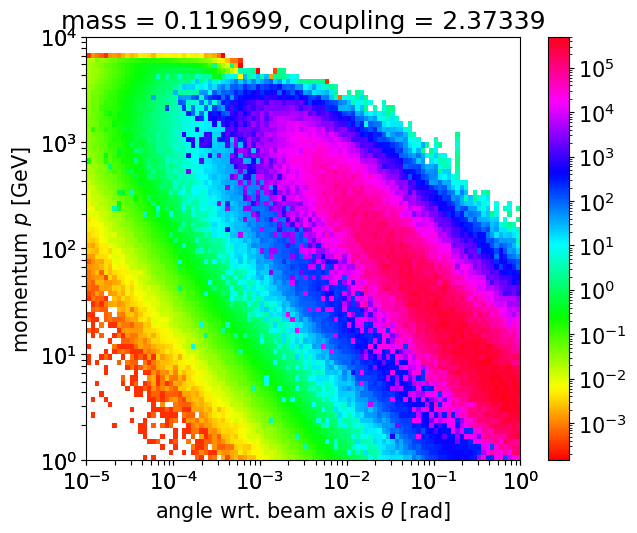

In [11]:
if type(mass) in [float, int]: mass = [mass]
if type(coupling) in [float, int]: coupling = [coupling]
model.set_gammas()
for m in mass:
    for coup in coupling:
        print("Evaluating (m, c) of ({}, {})".format(m, coup))
        plot,gamma_list=foresee.get_llp_spectrum(mass=m, coupling=coup, Acomp=Acomp, mHpm=mHpm, do_plot=True)
        plot.title("mass = {}, coupling = {}".format(m, coup))
        del plot

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER2 at the FPF. 

In [12]:
foresee.set_detector(
    #distance=620, 
    distance=480,
    selection="np.sqrt(x.x**2 + x.y**2)<1", 
    length=5, #wei's is 5, mine 10
    luminosity=3000, 
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

Let us plot the resulting energy distribution

## 3. Sensitivity Reach

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

In [ ]:
%%time
productions=[
   # TWO BODY DECAY PRODUCTIONS
     {"channels": ["5","-5"]                          , "color": "red"   , "label": r"$B \to X_s A$"      , "generators": ["Pythia8"]},
     # {"channels": ["130","321"]                       , "color": "green" , "label": r"$K \to \pi A$"      , "generators": ["Pythia8"]},#['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8']},
   # MESON MIXING PRODUCTIONS
     # {"channels": ["111","221","331"]                 , "color": "pink"  , "label": r"$mixing \to A$"     , "generators": ["Pythia8"]},#['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8']},
   # THREE BODY DECAY PRODUCTIONS (Just b -> K A A)
     # {"channels": ["5_di","-5_di"] , "color": "blue"  , "label": r"$B \to X_s AA$"     , "generators": ["Pythia8"]}
   # THREE BODY DECAY PRODUCTIONS (including the unknown one)
     #{"channels": ["5_di","-5_di","321_di","-321_di"] , "color": "blue"  , "label": r"$B \to X_s AA$"     , "generators": ["Pythia8"]}
]
# event_masses=model.get_mt()['p1mass']
event_masses=model.get_p1mass()
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1e0==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%1e0==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1e0==0 and 1<event_masses[i] and event_masses[i]<=3)] # ~11min for spectra , 77 min for res up to here @50 // @10? prospective 4.5 hours
#                     +[i for i in range(len(event_masses)) if (i%1e0==0 and 3<event_masses[i])]
# )
# use_these_indices = ([i for i in range(len(event_masses)) if (i%5e1==0 or (i%1e1==0 and i<5e3))]
# )
use_these_indices = [i for i in range(len(event_masses)) if i%1e1==0]
print(len(use_these_indices))

masses=[event_masses[i] for i in use_these_indices[::1]]

plot,(prods_m,prods_r)=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",  
    xlims=[0.1,5],#ylims=[1e-7,1e7],
    ylims=[9e-11,1e7],
    xlabel=r"Mass [GeV]",
    # ylabel=r"Production Rate $\sigma/\theta^2$ [pb]",
    ylabel=r"Production Rate $\sigma_\text{ref}$[pb]",
    # title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
    title=r"$\theta < 0.2$ mrad and $E > 100$ GeV at $tanb=1$,$Acomp=1$,$m_{H^\pm}=500$ GeV",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=2
)
# arr = model.get_Acomp()
# cmap_arr = [arr[i] for i in use_these_indices[::1]]
# cmap_name = "Acomp"
# plot=foresee.plot_production_pbp(
#     masses = masses,
#     productions = productions,
#     energy=energy,
#     condition="logth<-3.7 and logp>2",  
#     xlims=[0.1,5],#ylims=[1e-7,1e7],
#     ylims=[9e-11,1e7],
#     xlabel=r"Mass [GeV]",
#     ylabel=r"Production Rate $\sigma/\theta^2$ [pb]",
#     title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
#     legendloc=(0.97,1),
#     fs_label=12,
#     ncol=2,
#     cmap_arr=cmap_arr,
#     cmap_name=cmap_name
# )
# arr = model.get_ALdAK()
# cmap_arr = [arr[i] for i in use_these_indices[::1]]
# cmap_name = "AL:AK"
# plot=foresee.plot_production_pbp(
#     masses = masses,
#     productions = productions,
#     energy=energy,
#     condition="logth<-3.7 and logp>2",  
#     xlims=[0.1,5],#ylims=[1e-7,1e7],
#     ylims=[9e-11,1e7],
#     xlabel=r"Mass [GeV]",
#     ylabel=r"Production Rate $\sigma/\theta^2$ [pb]",
#     title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
#     legendloc=(0.97,1),
#     fs_label=12,
#     ncol=2,
#     cmap_arr=cmap_arr,
#     cmap_name=cmap_name
# )
# arr = model.get_kdl()
# cmap_arr = [arr[i] for i in use_these_indices[::1]]
# cmap_name = "kdl"
# plot=foresee.plot_production_pbp(
#     masses = masses,
#     productions = productions,
#     energy=energy,
#     condition="logth<-3.7 and logp>2",  
#     xlims=[0.1,5],#ylims=[1e-7,1e7],
#     ylims=[9e-11,1e7],
#     xlabel=r"Mass [GeV]",
#     ylabel=r"Production Rate $\sigma/\theta^2$ [pb]",
#     title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
#     legendloc=(0.97,1),
#     fs_label=12,
#     ncol=2,
#     cmap_arr=cmap_arr,
#     cmap_name=cmap_name
# )

4603


IndexError: list index out of range

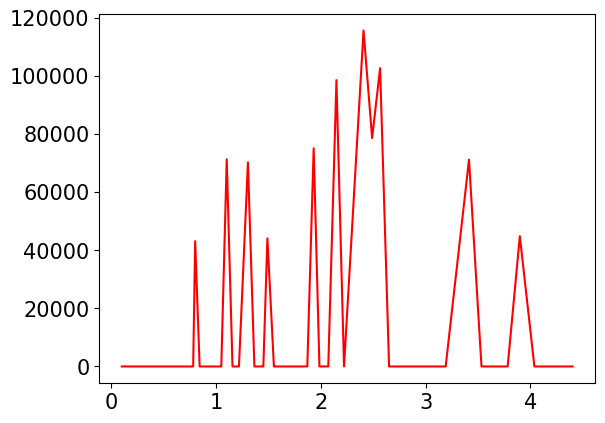

In [14]:
for i,p in enumerate(prods_r):
    plt.plot(prods_m,p,"r",label=productions[i]["label"])
plt.plot(prods_m, [prods_r[2][i]/prods_r[0][i] for i in range(len(prods_r[0]))],"magenta")
plt.plot(prods_m, [prods_r[1][i]/prods_r[0][i] for i in range(len(prods_r[0]))],"cyan")
# plt.plot([prods_m[0],prods_m[-1]],[1e5,1e5],"r")
plt.plot([prods_m[0],prods_m[-1]],[1e0,1e0],"k")
plt.plot([prods_m[0],prods_m[-1]],[1e-1,1e-1],"k")
plt.plot([prods_m[0],prods_m[-1]],[1e-2,1e-2],"k")
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-10,1e12)
plt.xlim(.1,)

Let us now scan over various masses and couplings, and record the resulting number of evets. Note that here we again consider the FASER2 configuration, which we set up before.

We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

> ## Below here is the short block to which I want to condense the point-by-point work.

In [13]:
setupnames = [#'EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5',
              'PYTHIA_pT=1'
]
list_nevents = {label:[] for label in setupnames}

modes = {'5': ['Pythia8'],
         '-5': ['Pythia8'], 
         
         # '130': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
         # '321': ['Pythia8'],
        # #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
         # '111': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
         # '221': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
         # '331': ['Pythia8'],
        #         #['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8'],
        #  '5_di': ['Pythia8'],
        # '-5_di': ['Pythia8'],
         
         #'321_di': ['Pythia8'], 
         #'-321_di': ['Pythia8']
}
model.set_gammas()
# mt = model.get_mt()
# event_masses = mt['mass']
# event_tanbs = mt['tanb']
event_masses = model.get_("mass")
event_tanbs = model.get_("tanb")
event_Acomps = model.get_Acomp()
event_mHpms = model.get_mHpm()
event_ALdAKs = model.get_ALdAK()

# use_these_indices = ([i for i in range(len(event_masses)) if (event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%8==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%100==0 and 1<event_masses[i] and event_masses[i]<=3)]
#                     +[i for i in range(len(event_masses)) if (i%50000==0 and 3<event_masses[i])])
# # bout an hour each
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%1==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1230000==0 and 1<event_masses[i] and event_masses[i]<=3)]
#                     +[i for i in range(len(event_masses)) if (i%12300000==0 and 3<event_masses[i])]
# )
# # # 15 sec ea
# use_these_indices = ([i for i in range(len(event_masses)) if (i%50==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%500==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1110000==0 and 1<event_masses[i] and event_masses[i]<=3)]
#                     +[i for i in range(len(event_masses)) if (i%11100000==0 and 3<event_masses[i])]
# )
# # # 5 min
# use_these_indices = ([i for i in range(len(event_masses)) if (i%2e0==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%1e2==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1e222==0 and 1<event_masses[i] and event_masses[i]<=3)]
#                     +[i for i in range(len(event_masses)) if (i%1e333==0 and 3<event_masses[i])]
# )
# # bout ~ 
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=.4)]
#                     +[i for i in range(len(event_masses)) if (i%1==0 and .4<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%10==0 and 1<event_masses[i] and event_masses[i]<=3)] # ~11min for spectra , 77 min for res up to here @50 // @10? prospective 4.5 hours
#                     +[i for i in range(len(event_masses)) if (i%12300000==0 and 3<event_masses[i])]
# )
# # FORESEE2D F2D01
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=1)]
#                      +[i for i in range(len(event_masses)) if (i%5==0 and 1<event_masses[i] and event_masses[i]<=3)]
# )
# # FORESEE2D F2D02 # 0-1-3 % 1-5 takes 15 for spectra
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1==0 and event_masses[i]<=1)]
#                      +[i for i in range(len(event_masses)) if (i%5==0 and 1<event_masses[i] and event_masses[i]<=3)] 
# )


# # # FORESEE2D F2D0x     ~ 25*2 min for 4.2k (s9 1,2,1e1) (l1/2/3 1,1,1e0)
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1e0==0 and event_masses[i]<=.25)]
#                     +[i for i in range(len(event_masses)) if (i%1e0==0 and .25<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1e0==0 and 1<event_masses[i])]
# )
# use_these_indices = ([i for i in range(len(event_masses)) if (i%1e0==0 and event_masses[i]<=.25)]
#                     +[i for i in range(len(event_masses)) if (i%1e0==0 and .25<event_masses[i] and event_masses[i]<=1)]
#                     +[i for i in range(len(event_masses)) if (i%1e2==0 and 1<event_masses[i])]
# )
# use_these_indices = [i for i in range(len(event_masses))]
use_these_indices = [i for i in range(len(event_masses)) if i%1e1==0]
# use_these_indices = [i for i in range(len(event_masses)) if i%1e2==0 and (event_masses[i]>.125 and event_masses[i]<1.05 and (event_masses[i]<.145 or event_masses[i]>.9 or (event_masses[i]>.54 and event_masses[i]<.57)))]

# #for wei's 2HDM replication in this format, going to downres  A LOT since 2M points on that grid
# use_these_indices = ([i for i in range(len(event_masses)) if (i%400==0 and event_masses[i] <= 1.5)]
#                     +[i for i in range(len(event_masses)) if (i%800==0 and 1.5<event_masses[i] and event_masses[i]<=3)])
print(len(use_these_indices))


4045


In [16]:
%%time
print(f"YEAR-MO-DY HR-MN-SC       #  \tevent\tmass")
for j,i in enumerate(use_these_indices[:5000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j: >7}",end="  |\t")
    event_mass = event_masses[i]
    
    print(f"{i: <6}\t{event_mass: <.6f}")
    foresee.get_llp_spectrum(mass=event_mass,coupling=1,Acomp=1,mHpm=500,suppress_outs=True)#90 for wei 2hdm repl
    
for j,i in enumerate(use_these_indices[5000:10000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+5000: >7}",end="  |\t")
    event_mass = event_masses[i]
    
    print(f"{i: <6}\t{event_mass: <.6f}")
    foresee.get_llp_spectrum(mass=event_mass,coupling=1,Acomp=1,mHpm=500,suppress_outs=True)#90 for wei 2hdm repl   
    
for j,i in enumerate(use_these_indices[10000:15000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+10000: >7}",end="  |\t")
    event_mass = event_masses[i]
    
    print(f"{i: <6}\t{event_mass: <.6f}")
    foresee.get_llp_spectrum(mass=event_mass,coupling=1,Acomp=1,mHpm=500,suppress_outs=True)#90 for wei 2hdm repl

for j,i in enumerate(use_these_indices[15000:]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+15000: >7}",end="  |\t")
    event_mass = event_masses[i]
    
    print(f"{i: <6}\t{event_mass: <.6f}")
    foresee.get_llp_spectrum(mass=event_mass,coupling=1,Acomp=1,mHpm=500,suppress_outs=True)#90 for wei 2hdm repl
   
# model.write_gammas(configuration)

YEAR-MO-DY HR-MN-SC       #  	event	mass
2024-09-08 17:37:56       0  |	0     	0.100193
2024-09-08 17:37:58       1  |	1     	0.101766
2024-09-08 17:38:00       2  |	2     	0.102558
2024-09-08 17:38:02       3  |	3     	0.102789
2024-09-08 17:38:04       4  |	4     	0.102933
2024-09-08 17:38:06       5  |	5     	0.103220
2024-09-08 17:38:08       6  |	6     	0.104184
2024-09-08 17:38:10       7  |	7     	0.105154
2024-09-08 17:38:12       8  |	8     	0.105189
2024-09-08 17:38:14       9  |	9     	0.106641
2024-09-08 17:38:16      10  |	10    	0.107198
2024-09-08 17:38:18      11  |	11    	0.107836
2024-09-08 17:38:20      12  |	12    	0.108110
2024-09-08 17:38:21      13  |	13    	0.108112
2024-09-08 17:38:23      14  |	14    	0.108776
2024-09-08 17:38:25      15  |	15    	0.109635
2024-09-08 17:38:27      16  |	16    	0.110467
2024-09-08 17:38:28      17  |	17    	0.110833
2024-09-08 17:38:30      18  |	18    	0.112208
2024-09-08 17:38:32      19  |	19    	0.113048
2024-09-08 17:38:34

In [17]:
%%time
print(f"YEAR-MO-DY HR-MN-SC       #  \tevent\tmass\t\ttanb")
for j,i in enumerate(use_these_indices[:5000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j: >7}",end="  |\t")
    event_mass = event_masses[i]
    event_tanb = event_tanbs[i]
    event_Acomp = event_Acomps[i]
    # Acomp=1.9646259095905485e-05
    event_mHpm = event_mHpms[i]
    print(f"{i: <6}\t{event_mass: <.6f}\t{event_tanb: <.6}")
    couplings, _, nevents, _, _  = foresee.get_events(mass=event_mass, energy=energy, couplings = [event_tanb], Acomp = event_Acomp, mHpm = event_mHpm, modes=modes)
    for k,label in enumerate(setupnames): list_nevents[label].append(nevents.T[k])
for j,i in enumerate(use_these_indices[5000:10000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+5000: >7}",end="  |\t")
    event_mass = event_masses[i]
    event_tanb = event_tanbs[i]
    event_Acomp = event_Acomps[i]
    # Acomp=1.9646259095905485e-05
    event_mHpm = event_mHpms[i]
    print(f"{i: <6}\t{event_mass: <.6f}\t{event_tanb: <.6}")
    couplings, _, nevents, _, _  = foresee.get_events(mass=event_mass, energy=energy, couplings = [event_tanb], Acomp = event_Acomp, mHpm = event_mHpm, modes=modes)
    for k,label in enumerate(setupnames): list_nevents[label].append(nevents.T[k])
for j,i in enumerate(use_these_indices[10000:15000]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+10000: >7}",end="  |\t")
    event_mass = event_masses[i]
    event_tanb = event_tanbs[i]
    event_Acomp = event_Acomps[i]
    # Acomp=1.9646259095905485e-05
    event_mHpm = event_mHpms[i]
    print(f"{i: <6}\t{event_mass: <.6f}\t{event_tanb: <.6}")
    couplings, _, nevents, _, _  = foresee.get_events(mass=event_mass, energy=energy, couplings = [event_tanb], Acomp = event_Acomp, mHpm = event_mHpm, modes=modes)
    for k,label in enumerate(setupnames): list_nevents[label].append(nevents.T[k])
for j,i in enumerate(use_these_indices[15000:]):
    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()),f"{j+15000: >7}",end="  |\t")
    event_mass = event_masses[i]
    event_tanb = event_tanbs[i]
    event_Acomp = event_Acomps[i]
    # Acomp=1.9646259095905485e-05
    event_mHpm = event_mHpms[i]
    print(f"{i: <6}\t{event_mass: <.6f}\t{event_tanb: <.6}")
    couplings, _, nevents, _, _  = foresee.get_events(mass=event_mass, energy=energy, couplings = [event_tanb], Acomp = event_Acomp, mHpm = event_mHpm, modes=modes)
    for k,label in enumerate(setupnames): list_nevents[label].append(nevents.T[k])


for label in setupnames: 
    result = np.array([event_masses,event_tanbs,list_nevents[label]], dtype='object') # different to how saved in lattice ver
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

YEAR-MO-DY HR-MN-SC       #  	event	mass		tanb
2024-09-08 17:54:19       0  |	0     	0.100193	12.4842
2024-09-08 17:54:19       1  |	1     	0.101766	12.3386
2024-09-08 17:54:20       2  |	2     	0.102558	6.47531
2024-09-08 17:54:20       3  |	3     	0.102789	9.6768
2024-09-08 17:54:20       4  |	4     	0.102933	4.51618
2024-09-08 17:54:20       5  |	5     	0.103220	5.84134
2024-09-08 17:54:21       6  |	6     	0.104184	12.0217
2024-09-08 17:54:21       7  |	7     	0.105154	5.81846
2024-09-08 17:54:21       8  |	8     	0.105189	16.7653
2024-09-08 17:54:22       9  |	9     	0.106641	8.77437
2024-09-08 17:54:22      10  |	10    	0.107198	8.81151
2024-09-08 17:54:22      11  |	11    	0.107836	3.1424
2024-09-08 17:54:23      12  |	12    	0.108110	28.5289
2024-09-08 17:54:23      13  |	13    	0.108112	8.61168
2024-09-08 17:54:23      14  |	14    	0.108776	15.3773
2024-09-08 17:54:24      15  |	15    	0.109635	8.52449
2024-09-08 17:54:24      16  |	16    	0.110467	13.2898
2024-09-08 17:54:24 

> ## End point-by-point-specific block.

Specify the setups (filename in model/results, legend name, outline color, outline style, fill alpha, level).

Then we specify all the existing bounds (filename in model/bounds directory, label, label position x, label position y, label rotation) **UPDATE BOUNDS**

We then specify other projected sensitivitities (filename in model/bounds [ i think it's in /lines] directory, color, label, label position x, label position y, label rotation)

We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position)  

Finally, we can plot everything using `foresee.plot_reach()`.

In [14]:
setups = [
     # ["14TeV_default_23Mayall_nomixing.npy",    "FASER2 (nomix)"  , "red",         "solid", 0., 3],#higher
     # ["14TeV_default_100_5-5.npy",    "FASER2 (100 5-5)"  , "magenta",         "solid", 0., 3], #low reach

    [f"13.6TeV_NMSSM_{confignum}_PYTHIA_pT=1.npy"   , f"NMSSM{confignum}: 3"     , "black" ,  "solid"  , 0.05, 3],
    
]
bounds = [
    # ["bounds_MicroBoone.txt", "$\mu$BooNE"  , 0.110, 30, 90 ],
    # ["bounds_2010.07644.txt", "NA62 $\pi^+$", 0.140, 40, 90 ],
    # ["bounds_E949.txt"      , "E949"        , 0.160, 30,0 ],
    # ["bounds_1508.04094.txt", "LHCb $B^0$"  , 1.100, 21, 10 ],
    # ["bounds_2011.11329.txt", "NA62 $K^+$"  , 0.150, 35, 45 ],
    
    # ["charm-tanb3.txt",  "",  0.700, 1e4, 0  ],
    # ["charm-tanb3s.txt",  "CHARM",  0.500, 1e1, 15  ],
    
    # ["bounds_SN1987.txt"      , "SN1987"        , 0.110, 1.2e5, 0 ], 
    
    # ["bounds_SN.txt"      , "SN1987"        , 0.110, 1.2e5, 0 ], 
]
projections = [
    # ["limits_SHiP.txt",       "teal",         "SHiP"    , 0.130, 2.0*10**-5, 330  ],
    # ["limits_MATHUSLA.txt",   "dodgerblue",   "MATHUSLA", 0.120, 5.0*10**-6, 0  ],
    # ["limits_CodexB.txt",     "deepskyblue",  "CodexB"  , 1.700, 2.0*10**-5, 0  ],
    # ["limits_LHCb.txt",       "cyan",         "LHCb"    , 3.800, 1.0*10**-4, 0  ],
]
# branchings = [
#     ["e_e"         , "red"          , "solid" , r"ee"               , 0.110, 0.30],
#     ["mu_mu"       , "orange"       , "solid" , r"$\mu\mu$"         , 0.170, 0.10],
#     ["pi+_pi-"     , "blue"         , "solid" , r"$\pi^+\pi^-$"     , 0.225, 0.05],
#     ["pi0_gamma"   , "dodgerblue"   , "solid" , r"$\pi^0\gamma$"    , 0.580, 0.02],
#     ["pi+_pi-_pi0" , "cyan"         , "solid" , r"$\pi^0\pi^+\pi^-$", 0.389, 0.05],
#     ["K_K"         , "green"        , "solid" , r"$KK$"             , 1.150, 0.105], 
# ]
branchings = None

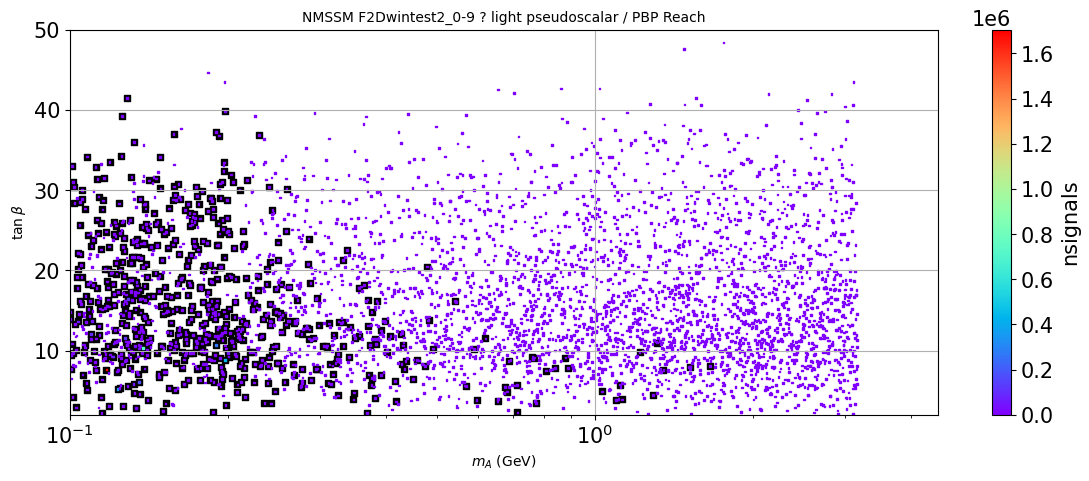

In [15]:
# plot_reach_pbp
for setup in [setups[0]]:
    plot, nsignals = foresee.plot_reach_pbp(
        setups=[setup],
        bounds=bounds,
        projections=projections,
        branchings=branchings,
        title=f"{modelname} {confignum} {configuration_subtitle} light pseudoscalar / PBP Reach",
        xlims=[0.1,4.5], 
        ylims=[2,50],
        # ylims=[5e1,1e7],
        xlabel=r"$m_{A}$ (GeV)",  
        ylabel=r"$\tan\beta$",

        ptsize=1.5,
        dpi=100,
        xscale="log",
        yscale="linear",
        cnorm="linear",
        
        use_these_indices=use_these_indices,
        
        legendloc=(1.,0.95),
        figsize=(14,5),
    )
    plot.savefig("Reach_"+f"{modelname}pbp_{confignum}"+".png")
    plot.show()
    plot.close()

Number of candiate events: 644


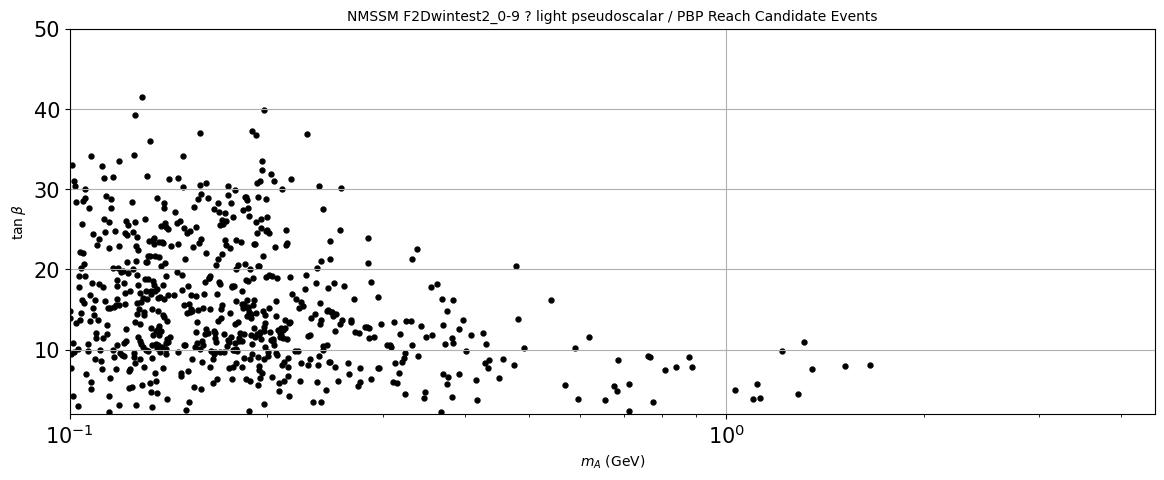

In [16]:
# plot_reach_pbp ACTUAL CANDIDATE events
for setup in [setups[0]]:
    plot = foresee.plot_reach_pbp_candidate(
        setups=[setup],
        bounds=bounds,
        projections=projections,
        branchings=branchings,
        title=f"{modelname} {confignum} {configuration_subtitle} light pseudoscalar / PBP Reach Candidate Events",
        xlims=[0.1,4.5],         
        ylims=[2,50],
        # ylims=[5e1,1e7],
        xlabel=r"$m_{A}$ (GeV)",  
        ylabel=r"$\tan\beta$",

        ptsize=5,
        dpi=100,
        xscale="log",
        yscale="linear",
        cnorm="log",
        
        use_these_indices=use_these_indices,
        
        legendloc=(1.,0.95),
        figsize=(14,5),
    )
    plot.savefig("Reach_"+f"{modelname}pbp_{confignum}_candidates"+".png")
    plot.show()
    plot.close()

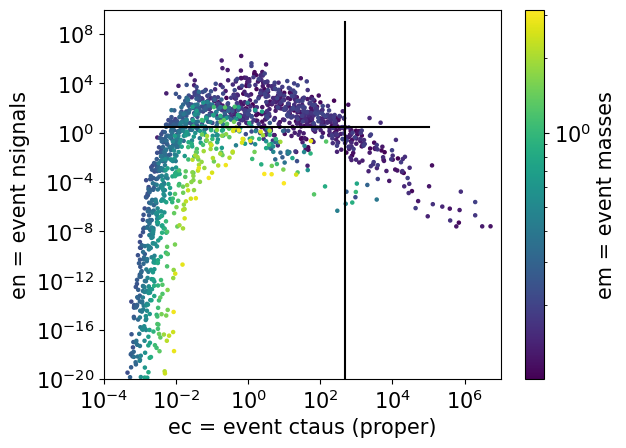

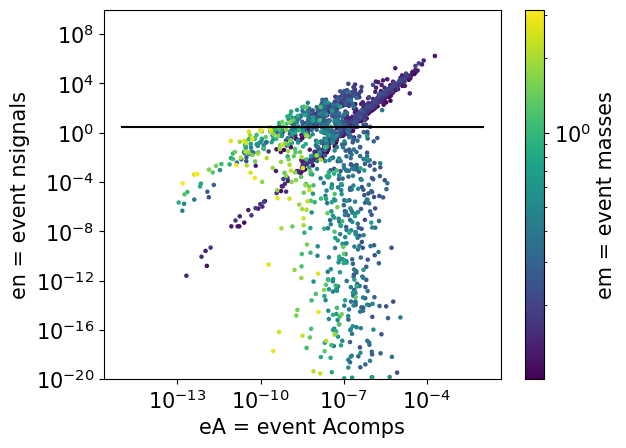

CPU times: total: 1.05 s
Wall time: 1.1 s


In [17]:
%%time
def gothere(n):
    if n!=0: print(n)
    return n+1
n=gothere(0)

MAXTB=50e100
MINNSIG=-1e-12
NSAMP=1e30# 1min/1k # 10k crashes the all of it ( when hanging onto all vals in file_gammas)
NSAMP=min(int(NSAMP),len(use_these_indices))
NEXTRAGAMS=5e0
NEXTRAGAMS=int(max(0,NEXTRAGAMS))

emlist=[]; mlabel="em = event masses"
etlist=[]; tlabel="et = event tanbs"
enlist=[]; nlabel="en = event nsignals"
eclist=[]; clabel="ec = event ctaus (proper)"
# event_Acomps = model.get_Acomp()
event_Acomps = model.get_("p1Acomp")
event_mHpms = model.get_mHpm()
eAlist=[]; Alabel="eA = event Acomps"
eHlist=[]; Hlabel="eH = event mHpms"
eKList=[]; KLabel="AL:AK by event"
# emulist=[]; mulabel="mueff by event"
for j,i in enumerate(use_these_indices[:NSAMP]):
    em=event_masses[i]
    et=event_tanbs[i]
    en=nsignals[j][0]
    ec=model.get_ctau(em,et)
    eA=event_Acomps[i]**2
    eH=event_mHpms[i]
    eKL=event_ALdAKs[i]
    # emu=model.get_mueff()[i]
    # if True:
    
    if en<MINNSIG or et>MAXTB: continue
    if True or en>1e-20:
        emlist.append(em)
        etlist.append(et)
        enlist.append(en)
        eclist.append(ec)
        eAlist.append(eA)
        eHlist.append(eH)
        eKList.append(eKL)
        # emulist.append(emu)
        if False and en>3e0:
            print(f"m {em:.6f}\tt {et:.6f}\tctau {ec:.3f}\tnsig {en:.1f}",end="\t")
            for k in range(int(np.log10(en))):
                print("*",end="")
            print()

plt.figure()
plt.scatter(eclist,enlist,c=emlist,norm="log",cmap="viridis",s=5)
plt.colorbar(label=mlabel)
plt.xlabel(clabel)
plt.ylabel(nlabel)
plt.xlim(1e-4,1e7)
plt.ylim(1e-20,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.show()
plt.close()

plt.figure()
plt.scatter(eAlist,enlist,c=emlist,norm="log",cmap="viridis",s=5)
plt.colorbar(label=mlabel)
plt.xlabel(Alabel)
plt.ylabel(nlabel)
plt.ylim(1e-20,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((1e-15,1e-2),(3,3),c="k")
plt.show()
plt.close()

In [18]:
%%time
def damn_near(a,b):
    err = 0.000001
    return (1-err)*a <= b and b <= (1+err)*a
# match_events = []
#                 0              1          2      3     4     5       6
# #         event ~ [nsignals    mass     tanb ALDOM/AKDOM kdl  mueff proplifetime   ...]
# names_of_things = ["nsignals","mass",  "tanb","AL:AK","kdl", "mueff","ctau","Adoubletmixing"]
# scales_of_things = [   "log",  "log","linear",  "log","log","linear", "log","log"]
# things =          [nsignals,model.get_("mass").tolist(),model.get_("tanb").tolist(),model.get_ALdAK(),model.get_kdl(),model.get_("mueff").tolist(),model.get_("ctau").tolist(),model.get_Adoubletmixing()]

names_of_things = []
scales_of_things = []
things = []

names_of_things.append("nsignals") # 0
scales_of_things.append("log")
NSIGNALS = [_ for [_] in nsignals]
things.append(NSIGNALS)

names_of_things.append("mass") # 1
scales_of_things.append("log")
list_of_the_thing = model.get_("mass").tolist()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
MASS = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)

names_of_things.append("tanb") # 2
scales_of_things.append("linear")
list_of_the_thing = model.get_("tanb").tolist()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
TANB = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)

names_of_things.append("AL:AK") # 3
scales_of_things.append("log")
list_of_the_thing = model.get_ALdAK()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
ALDAK = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)

names_of_things.append("kdl") # 4
scales_of_things.append("log")
list_of_the_thing = model.get_kdl()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
KDL = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)

names_of_things.append("mueff") # 5
scales_of_things.append("linear")
list_of_the_thing = model.get_("mueff").tolist()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
MUEFF = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)

names_of_things.append("ctau") # 6
scales_of_things.append("log")
list_of_the_thing = model.get_("ctau").tolist()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
CTAU = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)

names_of_things.append("Adoubletmixing") # 7
scales_of_things.append("log")
list_of_the_thing = model.get_Adoubletmixing()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
ADOUBLETMIXING = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)

names_of_things.append("Akappa") # 8
scales_of_things.append("linear")
list_of_the_thing = model.get_("Akappa").tolist()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
AKAPPA = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)

names_of_things.append("Alambda") # 9
scales_of_things.append("linear")
list_of_the_thing = model.get_("Alambda").tolist()
list_of_the_thing = [_ for i,_ in enumerate(list_of_the_thing) if i in use_these_indices]
ALAMBDA = [_ for _ in list_of_the_thing]
things.append(list_of_the_thing)


# for j in range(len(enlist)):
#     match_events.append([enlist[j],emlist[j],etlist[j]])
    
# n=gothere(n)


# errmass=0
# errtb=0
# with open("{}{}".format("model/", f"NMSSM_big_valid_events_list_{confignum}.txt")) as f:
#     f_reader = csv.reader(f, delimiter=" ")
#     print("|",end="")
#     for i in range(100-2): print("=",end="")
#     print("|\n",end="|")
#     for i,r in enumerate(f_reader):
#         if (10000*i/198000)%100==0:
#             print("-",end="")
#             # n=gothere(n)
#         row = [float(x) for x in r if x!=""] #my outreader.py output has the 0s here already
#         # if i%1e10<1:print(row,"\n")

#         for j in range(len(match_events)):
            
#             # if (damn_near(match_events[j][1],row[36])):    #masses
#             if match_events[j][1]==row[36]:
#                 # print("masses match")
#                 # print(match_events[j][1],row[36])
#                 # if (damn_near(match_events[j][2],row[1])): #tanbs
#                 if match_events[j][2]==row[1]:
#                     # print("tbs match")
#                     # print(match_events[j][2],row[1])
#                     match_events[j]+=[ ( 246.22**2*row[19]**2/row[23]*row[1]/(1+row[1]**2)*row[21] ) / ( -3*row[20]/row[19]*row[23]*row[22] ) ]
#                     match_events[j]+=[row[20]/row[19]]
                    
#                     match_events[j]+=[row[23]]
                    
#                     match_events[j]+=[eclist[j]]
#                     # print("we got a registered match")
#                     # print(match_events[j])



                    
#                     break
#                 else:

#                     # print("tbs don't?")

#                     # print(f"masses match\n\tbut tanbs dont\n\t{match_events[j][1]}\t{row[36]}\nxx\t{match_events[j][2]}\t{row[1]}\n")
#                     errtb+=1
#                     # print(match_events[j][2],row[1])
#                     pass
#             elif (damn_near(match_events[j][2],row[1])):   #just tbs
#                 # print("masses not close but yes tbs?")
#                 # print(f"tanbs match\n\tbut masses dont\nxx\t{match_events[j][1]}\t{row[36]}\n\t{match_events[j][2]}\t{row[1]}\n")
#                 errmass+=1
#     print("|")
# f.close()


# copyarr=[]
# for i in range(len(match_events)):
#     if len(match_events[i])>3:copyarr.append([elem for elem in match_events[i]])
# match_events=[]
# for r in copyarr:
#     match_events.append(r)

CPU times: total: 8.52 s
Wall time: 8.57 s


In [19]:
# counting
print(f"nsignals\tmass\t\ttanb\t\tal:ak\t\tkdl\t\tmueff\t\tctau\tadoubmix\takappa\t\talambda")
for i in range(len(things[0])):
    if things[0][i]>3 and things[2][i]>40:
    # if things[0][i]>3 and things[9][i]>19000:
    # if things[0][i]>3e0 and things[8][i]<-4.95:
    # if things[-2][i]>=0:
        for j in range(len(things)): print(f"{things[j][i]: >11.4f}",end="   |")
        print()

nsignals	mass		tanb		al:ak		kdl		mueff		ctau	adoubmix	akappa		alambda
   427.2375   |     0.1287   |    41.4696   |   317.7655   |     0.0053   |   413.7900   |     1.1239   |     0.0012   |    -0.3580   | 14065.5000   |


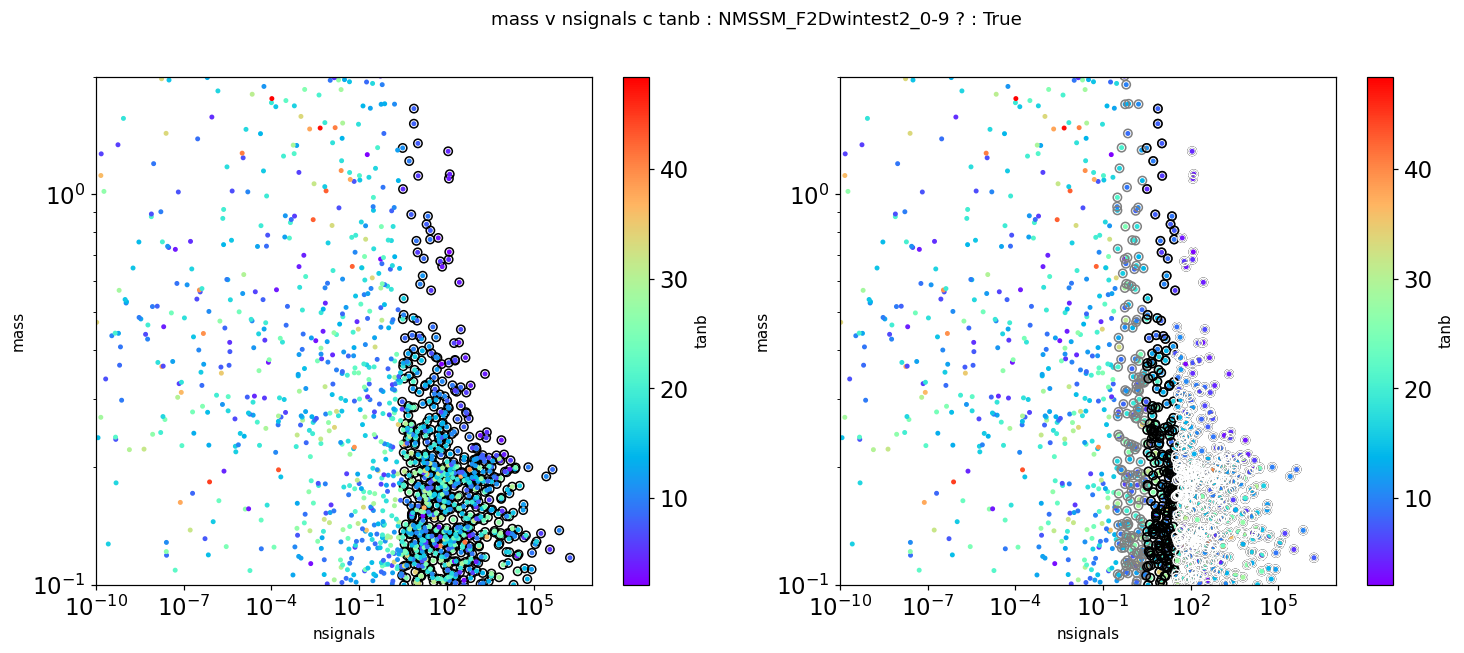

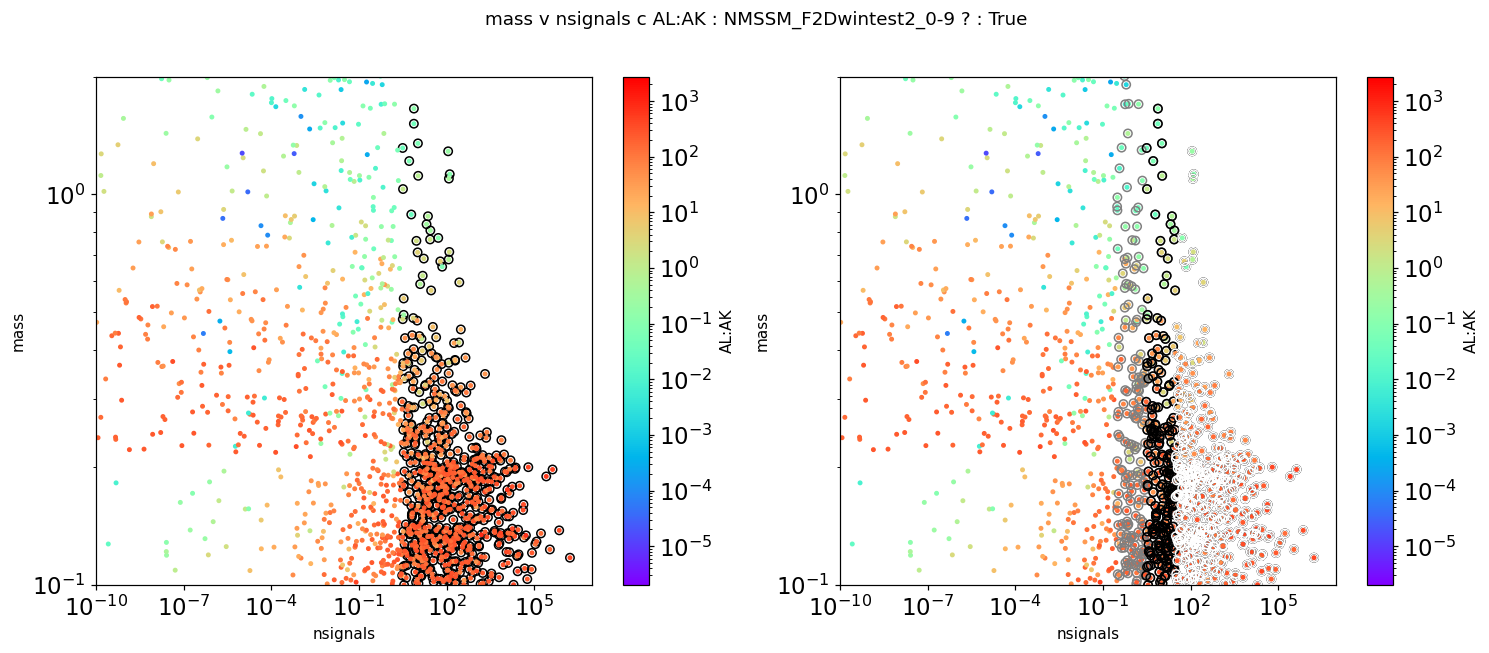

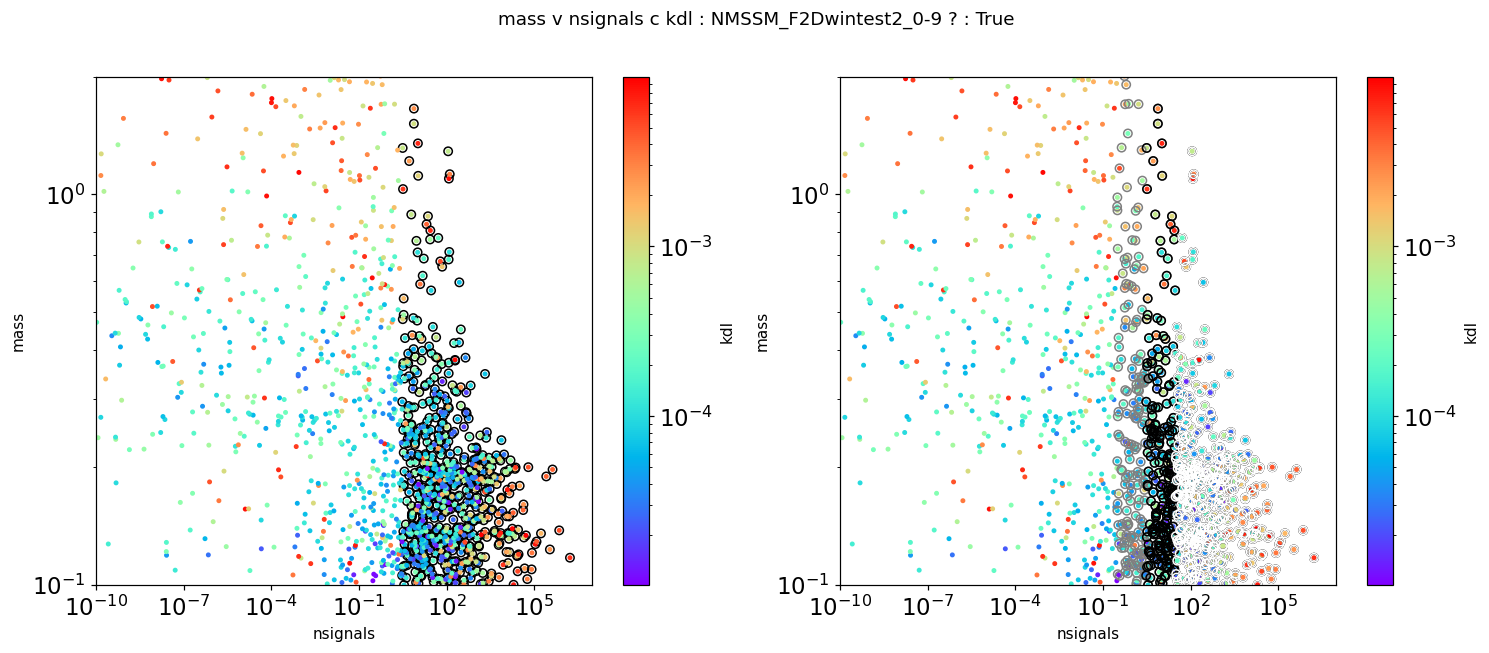

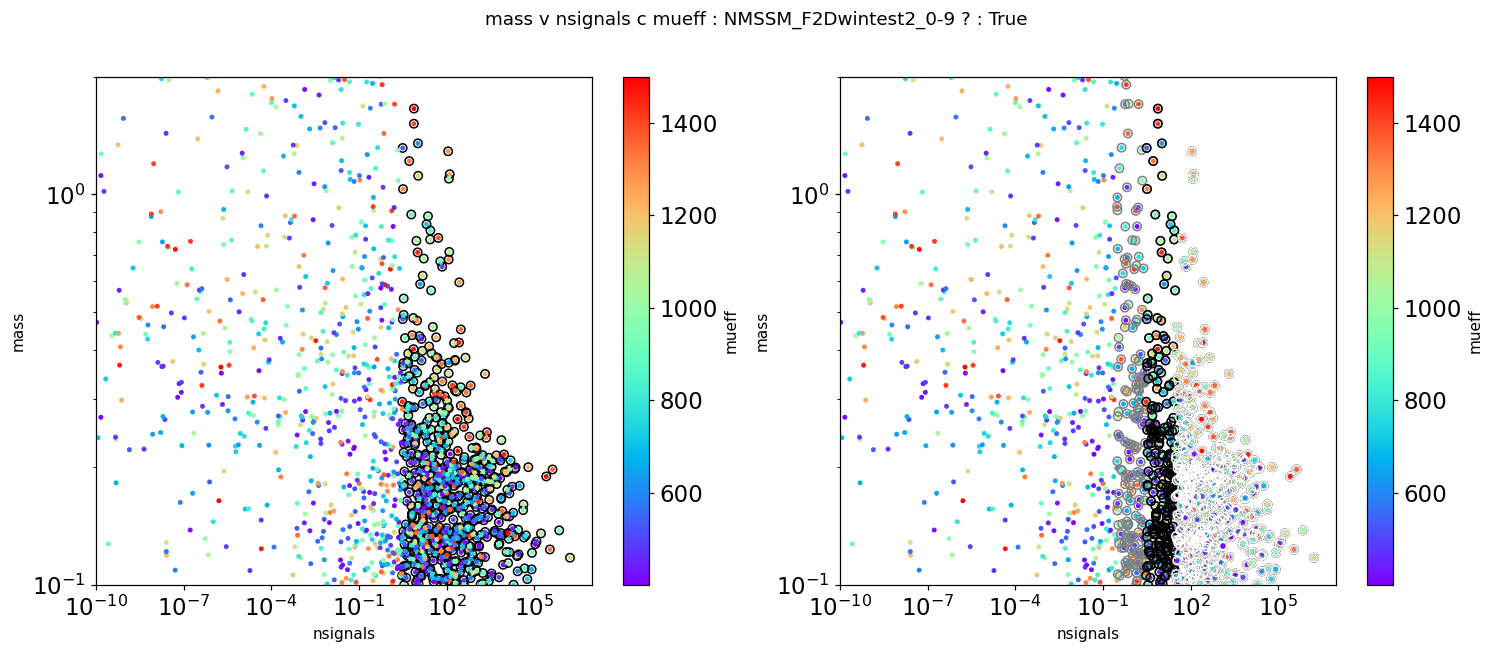

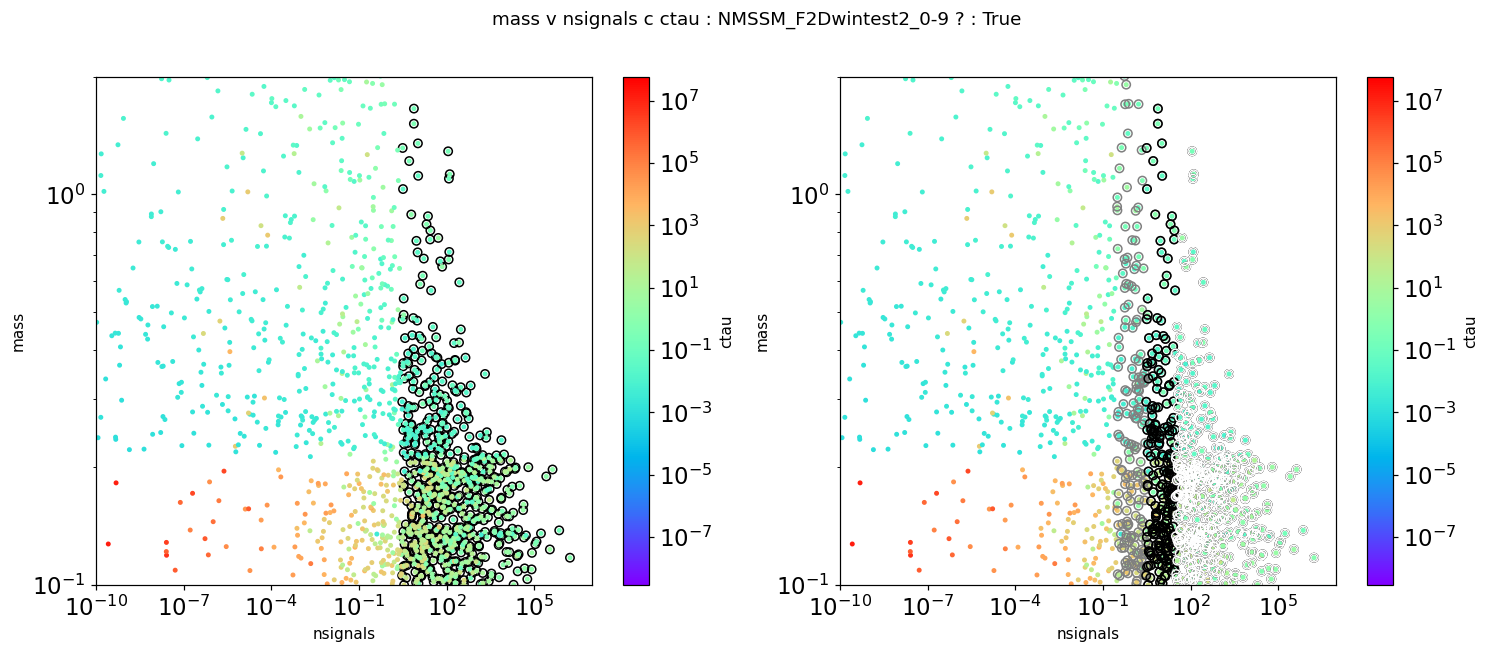

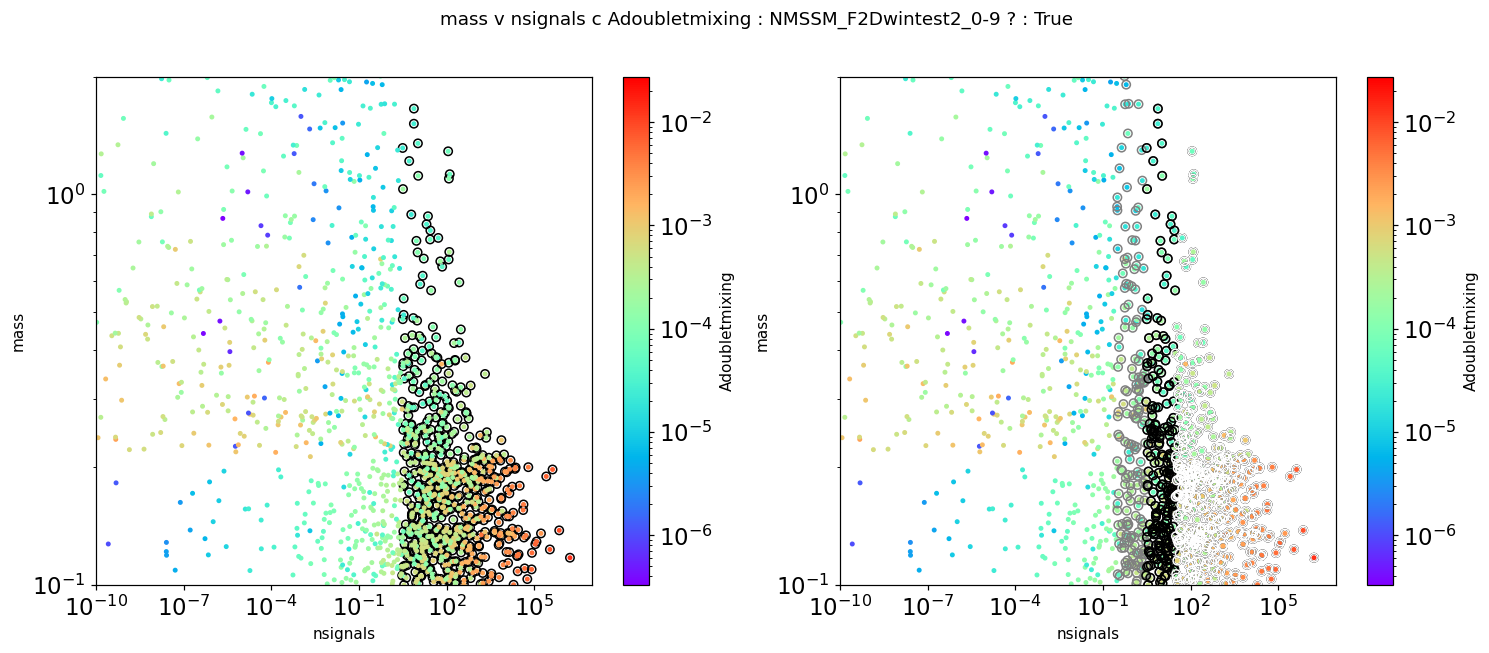

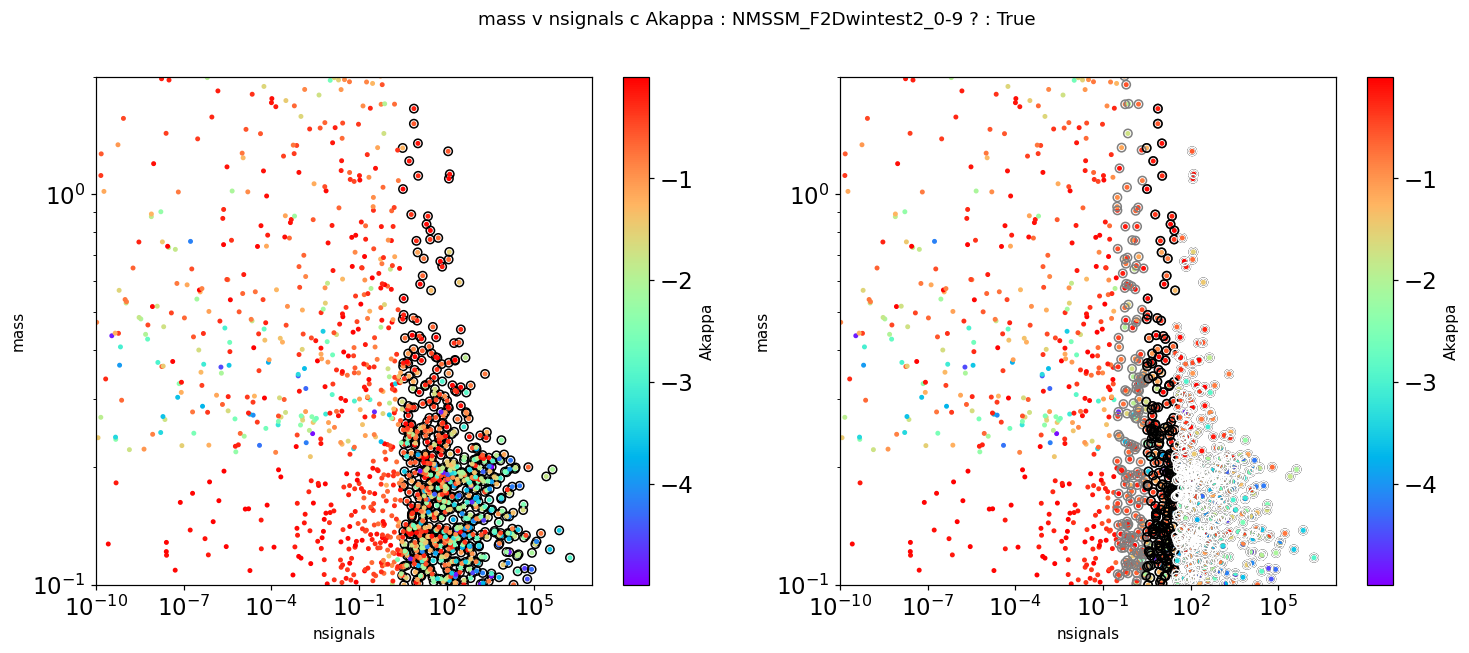

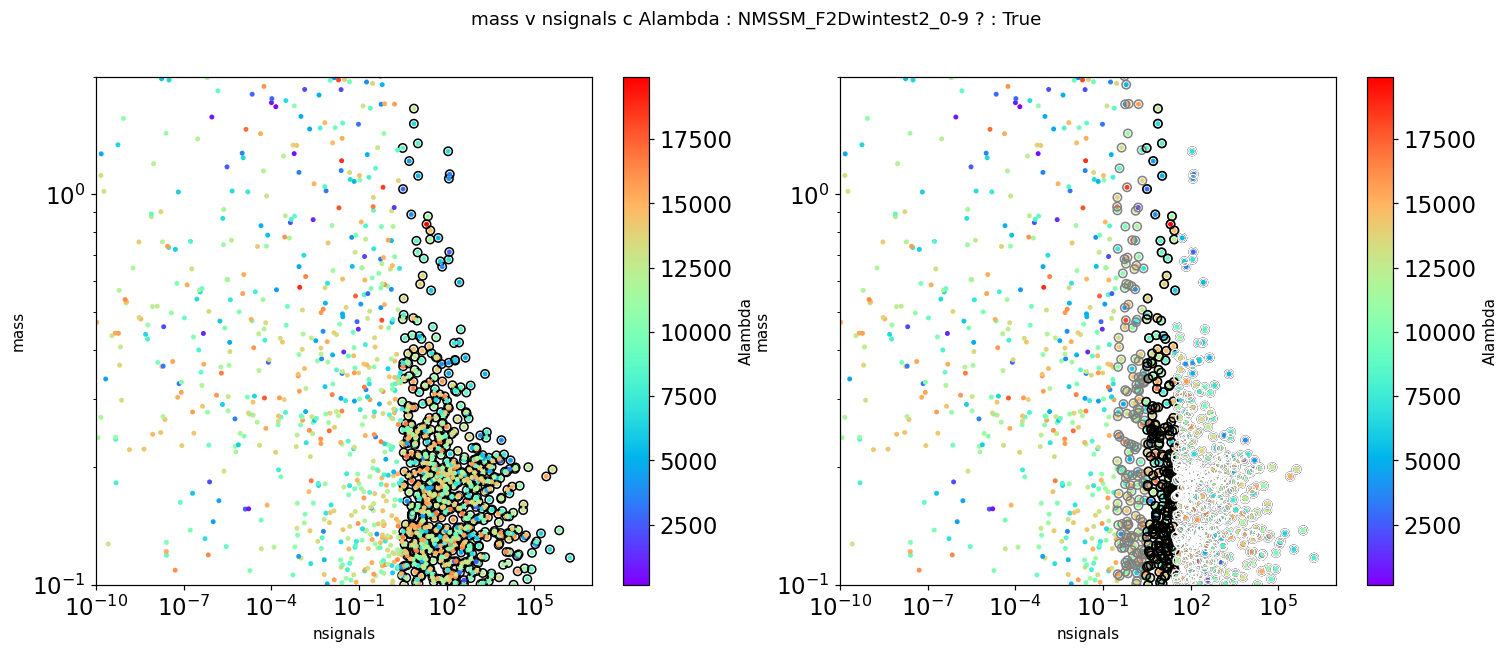

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


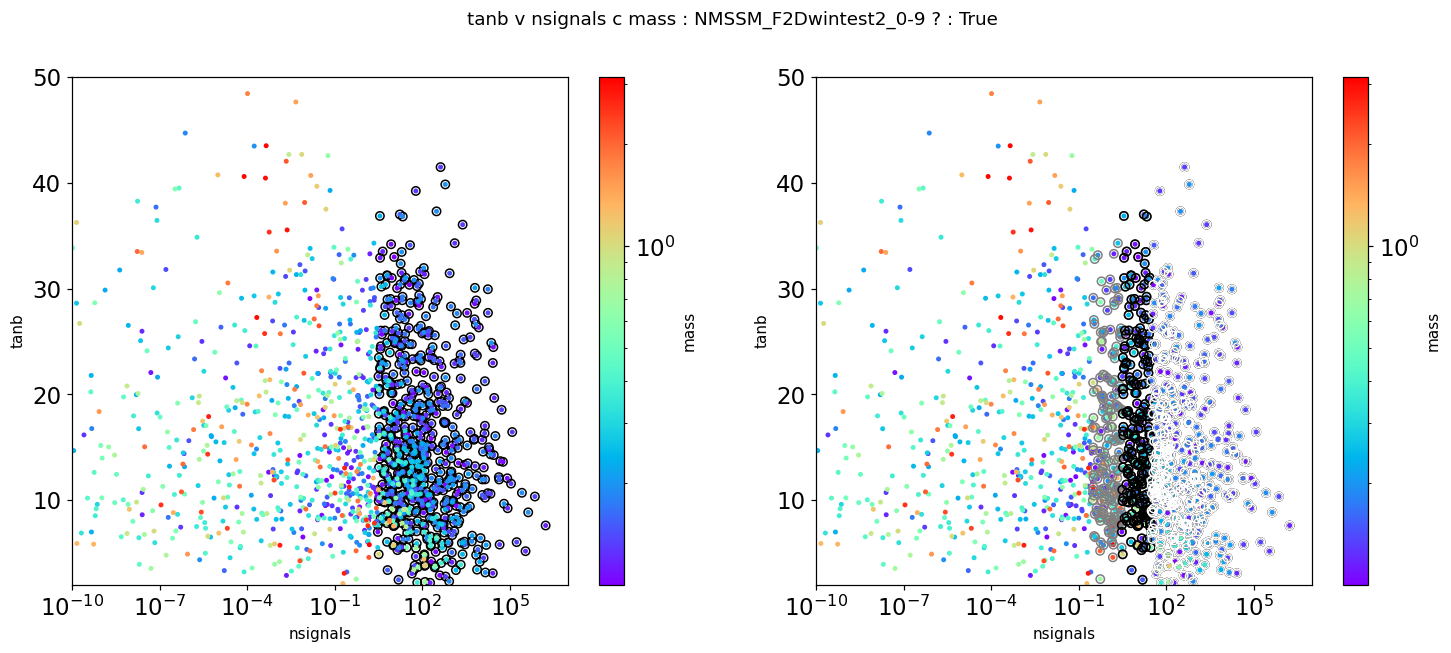

KeyboardInterrupt: 

In [20]:
condition = "True"# "3e-4<r[4] and r[4]<3e-3"

for x in range(len(things)):
    for y in range(len(things)):
        if x>=y: continue
        for c in range(len(things)):
            if c==x or c==y: continue
            
            if things[x][0]==things[x][-1]: continue # if the   x   param doesn't change over the run
            if things[y][0]==things[y][-1]: continue # if the   y   param doesn't change over the run
            if things[c][0]==things[c][-1]: continue # if the color param doesn't change over the run

            skipntme=[2,9]
            # if x not in skipntme and y not in skipntme: continue #  let's see tanb for now
            
            x_arr = []
            y_arr = []
            x_arr2 = []
            x_arr3 = []
            x_arr4 = []
            y_arr2 = []
            y_arr3 = []
            y_arr4 = []
            c_arr = []
            for ir in range(len(things[0])):
                if eval(condition):
                    x_arr.append(things[x][ir])
                    y_arr.append(things[y][ir])
                    c_arr.append(things[c][ir])
                    if things[0][ir]>=3e-1:
                        x_arr4.append(things[x][ir])
                        y_arr4.append(things[y][ir])   
                    if things[0][ir]>=3:
                        x_arr2.append(things[x][ir])
                        y_arr2.append(things[y][ir])              
                        if things[0][ir]>=3e1:
                            x_arr3.append(things[x][ir])
                            y_arr3.append(things[y][ir])         
                            
                        
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6),dpi=110)
            fig.suptitle(f"{names_of_things[y]} v {names_of_things[x]} c {names_of_things[c]} : " + configuration + " " + configuration_subtitle + " : " + condition,fontsize=12)

                # LEFT SUBPLOT
            ax1.scatter(x_arr2,y_arr2,facecolors='none', edgecolors='k',s=30)
            if c!=0: lplot = ax1.scatter(x_arr,y_arr,c=c_arr,norm=scales_of_things[c],cmap="rainbow",marker='.',s=20) # TEMP structure to force
            else: lplot = ax1.scatter(x_arr,y_arr,c=c_arr,norm="linear",cmap="rainbow",marker='.',s=20)               #  nsignals to be linear on norm
                # RIGHT SUBPLOT
            if c!=0: rplot = ax2.scatter(x_arr,y_arr,c=c_arr,norm=scales_of_things[c],cmap="rainbow",marker='.',s=20) # TEMP structure to force
            else: rplot = ax2.scatter(x_arr,y_arr,c=c_arr,norm="linear",cmap="rainbow",marker='.',s=20)               #  nsignals to be linear on norm
            ax2.scatter(x_arr4,y_arr4,facecolors='none', edgecolors='gray',s=30)
            ax2.scatter(x_arr2,y_arr2,facecolors='none', edgecolors='k',s=30)
            ax2.scatter(x_arr3,y_arr3,facecolors='none', edgecolors='w',s=30)
            
            lcb = plt.colorbar(lplot, ax=ax1)
            rcb = plt.colorbar(rplot, ax=ax2)
            lcb.set_label(label=names_of_things[c], fontsize=10)
            rcb.set_label(label=names_of_things[c], fontsize=10)
            
            ax1.set_xlabel(names_of_things[x],fontsize=10)
            ax1.set_ylabel(names_of_things[y],fontsize=10)
            ax1.set_xscale(scales_of_things[x])
            ax1.set_yscale(scales_of_things[y])
            ax2.set_xlabel(names_of_things[x],fontsize=10)
            ax2.set_ylabel(names_of_things[y],fontsize=10)
            ax2.set_xscale(scales_of_things[x])
            ax2.set_yscale(scales_of_things[y])
            
            # x lims
            x_name = names_of_things[x]
            (MASS_MIN,MASS_MAX)=(.1,2)
            (TANB_MIN,TANB_MAX)=(2,50)
            if x_name=="nsignals":
                ax1.set_xlim(1e-10,1e7)
                ax2.set_xlim(1e-10,1e7)
            elif x_name=="mass":
                ax1.set_xlim(MASS_MIN,MASS_MAX)
                ax2.set_xlim(MASS_MIN,MASS_MAX)
            elif x_name=="tanb":
                ax1.set_xlim(TANB_MIN,TANB_MAX)
                ax2.set_xlim(TANB_MIN,TANB_MAX)
            elif x_name=="AL:AK": pass
            # y lims
            y_name = names_of_things[y]
            if y_name=="nsignals":
                ax1.set_ylim(1e-10,1e7)
                ax2.set_ylim(1e-10,1e7)
            elif y_name=="mass":
                ax1.set_ylim(MASS_MIN,MASS_MAX)
                ax2.set_ylim(MASS_MIN,MASS_MAX)
            elif y_name=="tanb":
                ax1.set_ylim(TANB_MIN,TANB_MAX)
                ax2.set_ylim(TANB_MIN,TANB_MAX)
            elif y_name=="AL:AK": pass

            plt.show()
            plt.close()

        print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////")
        
            


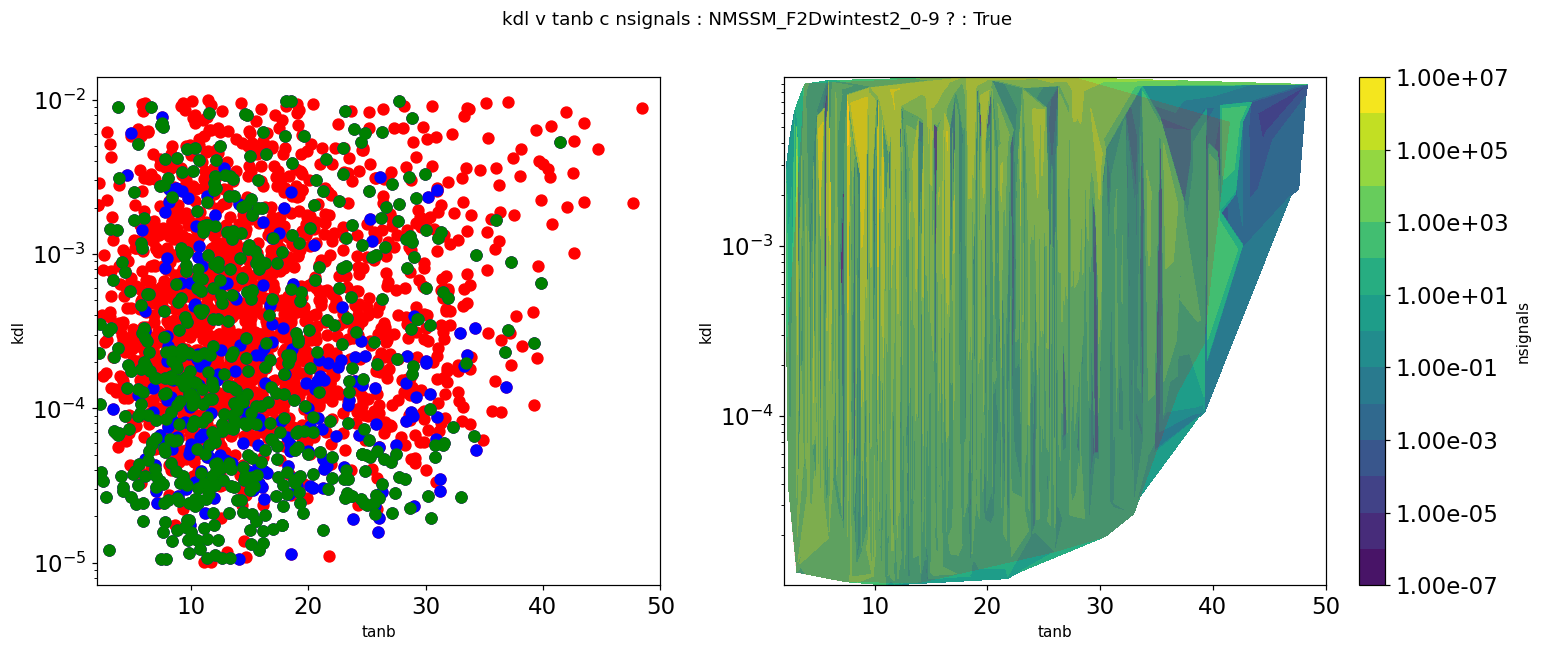

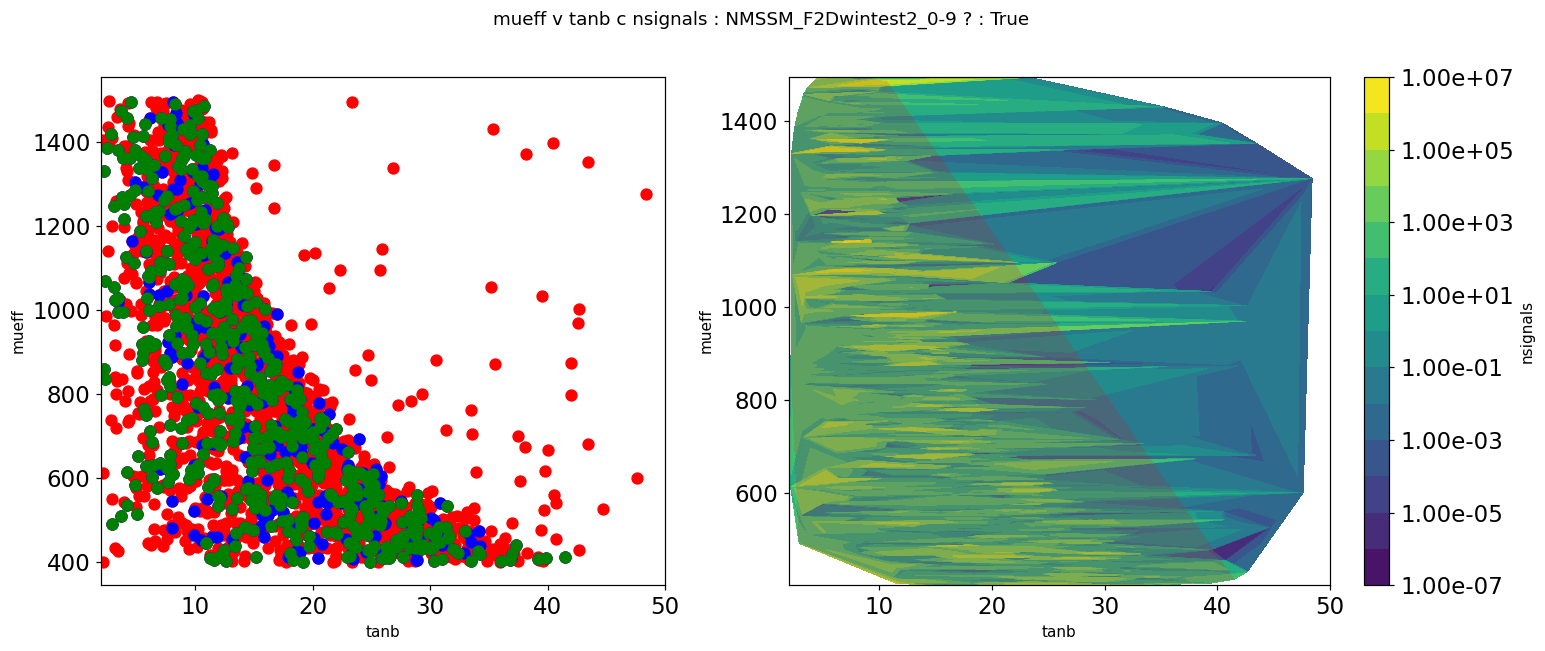

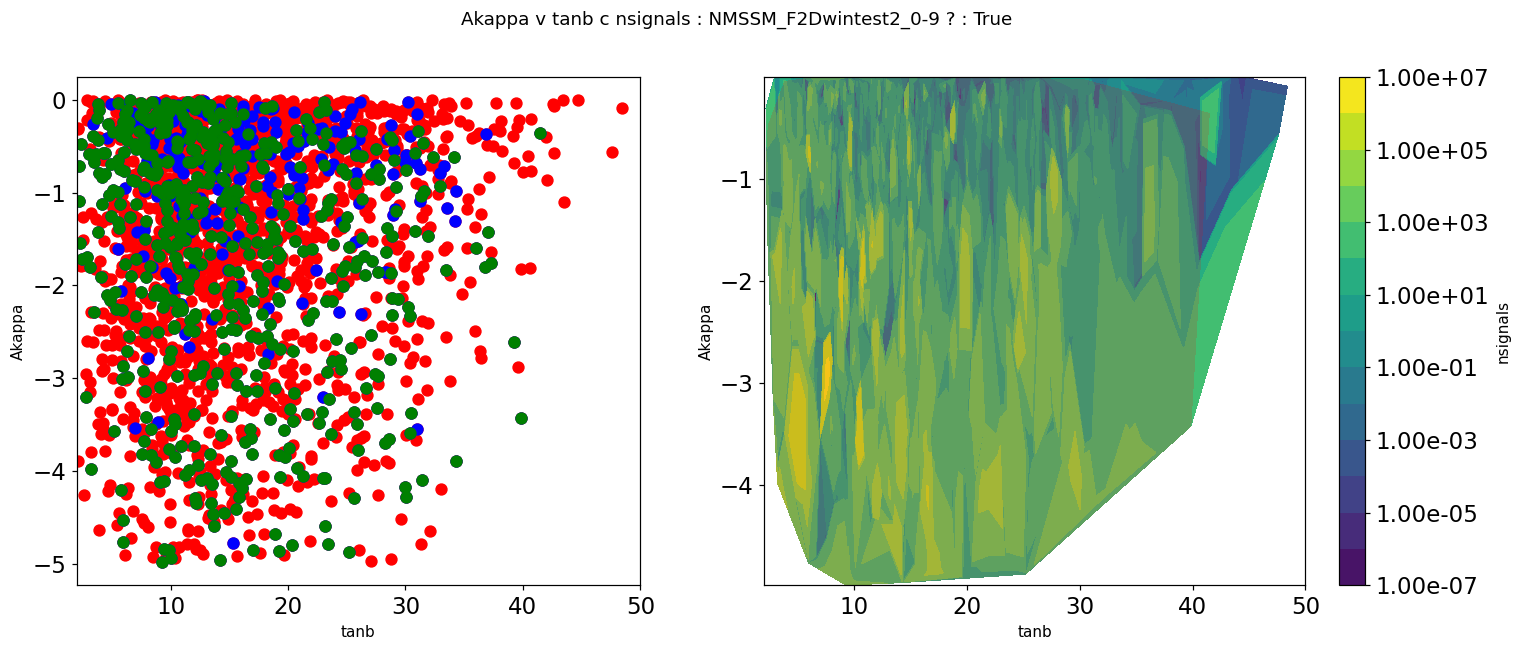

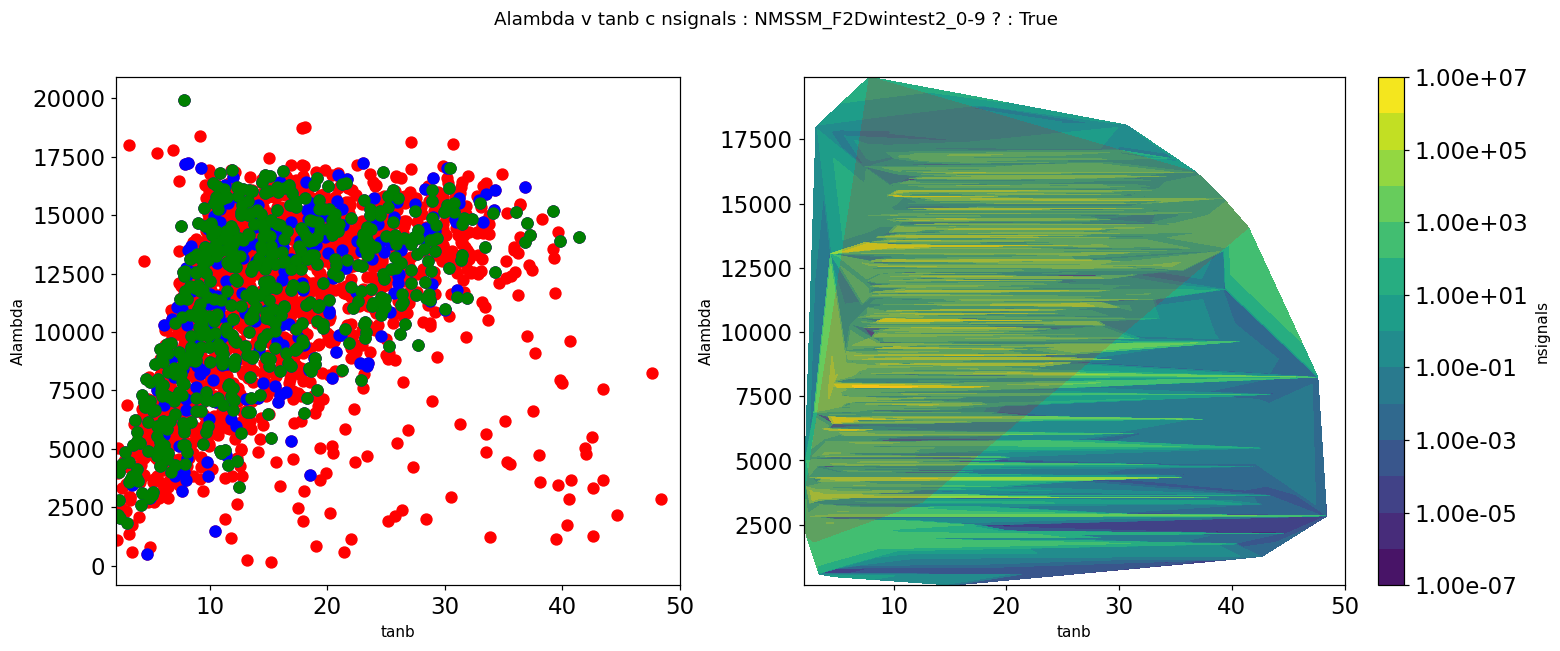

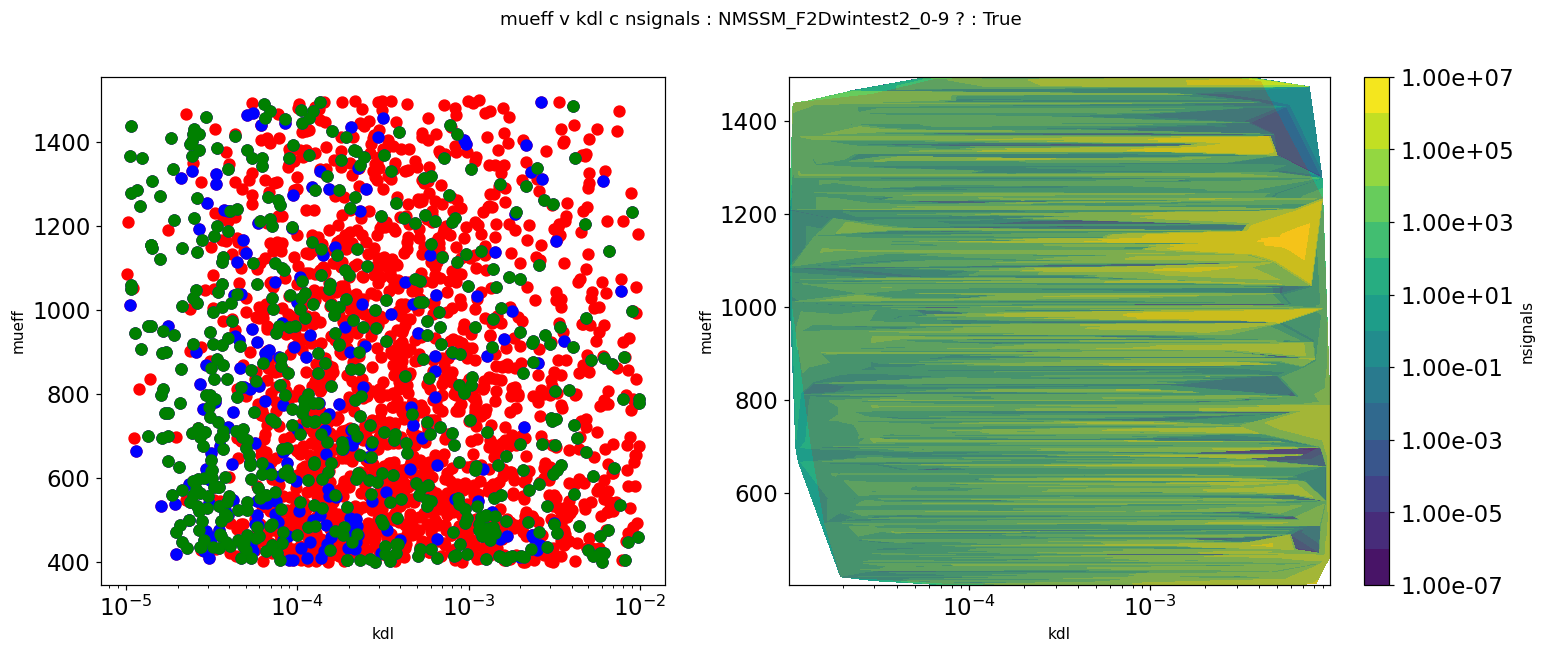

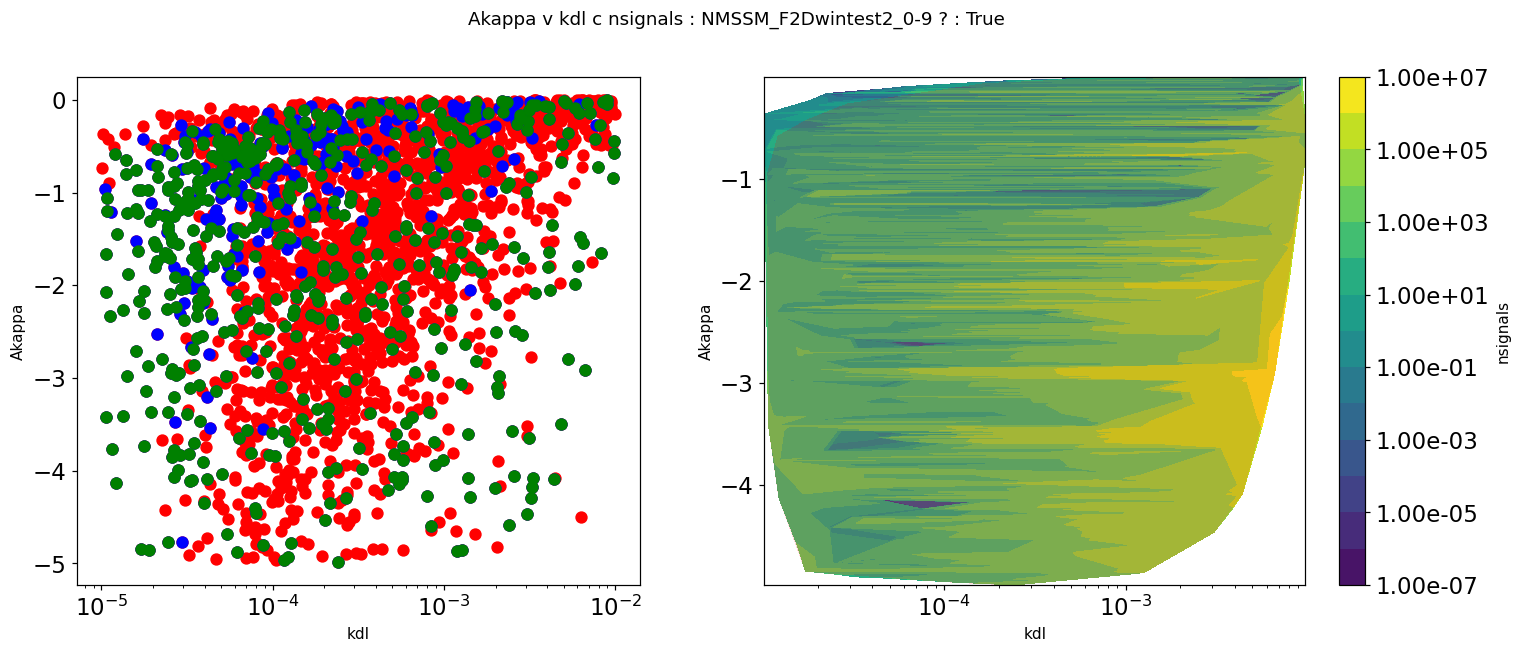

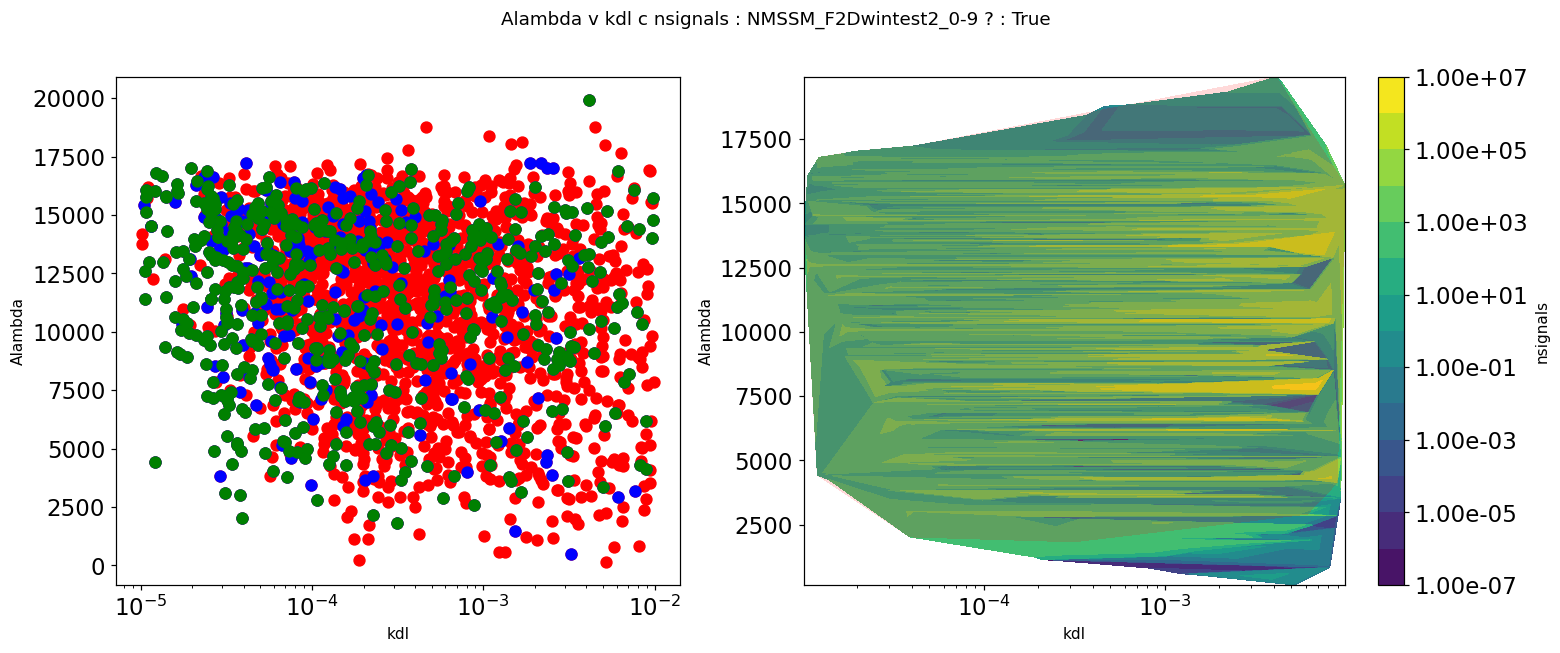

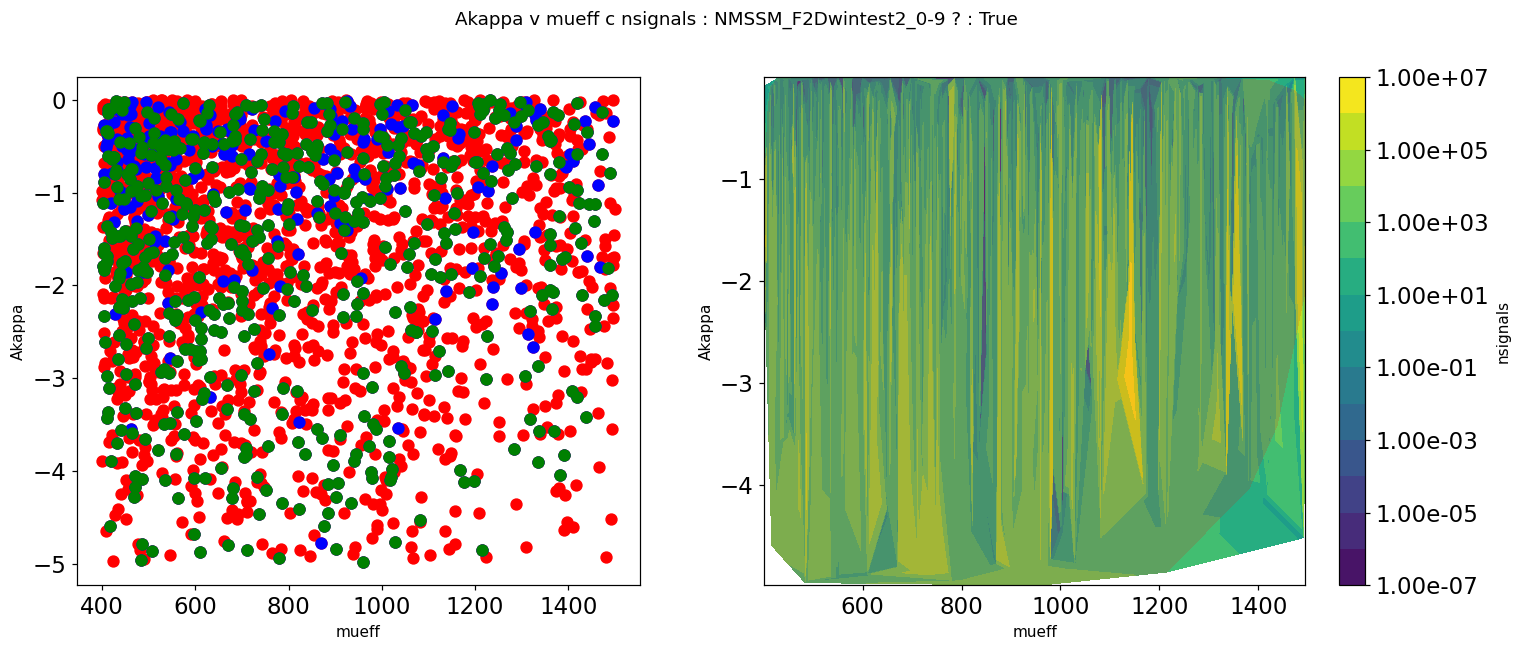

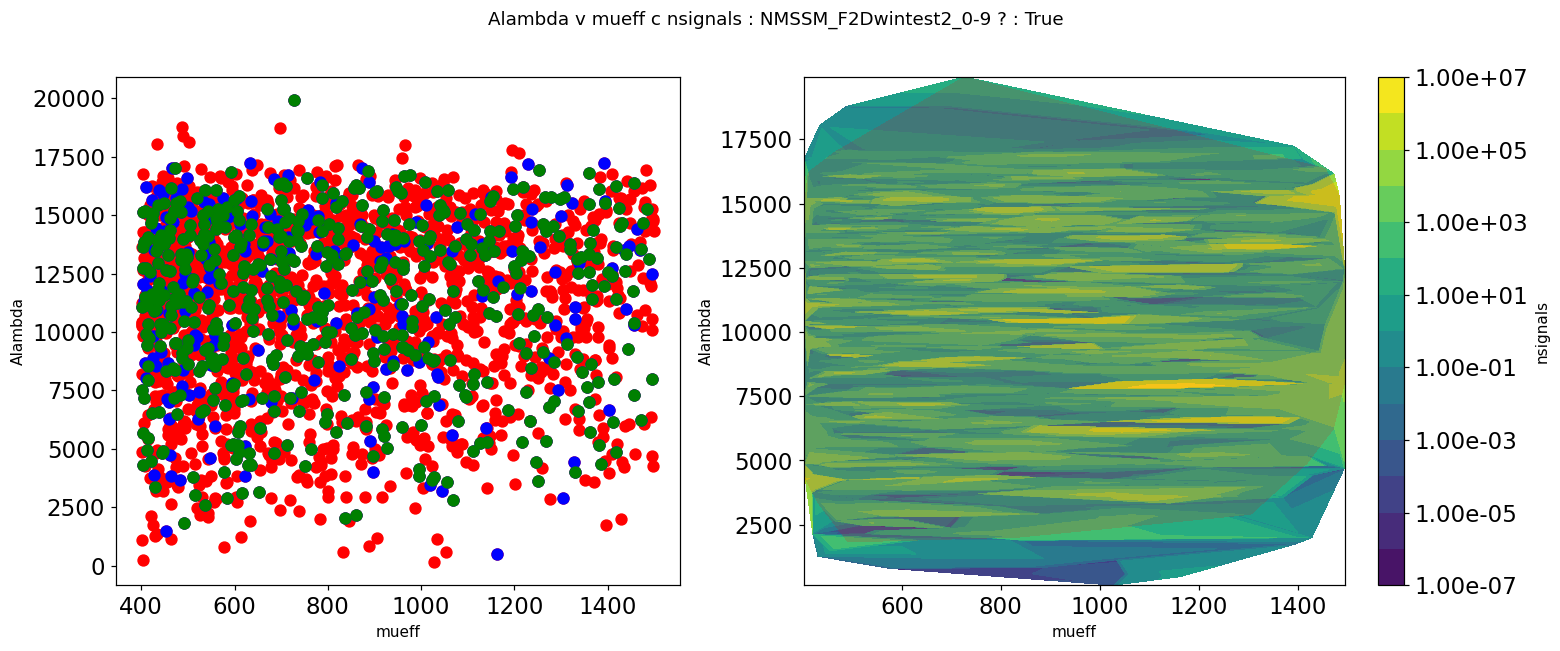

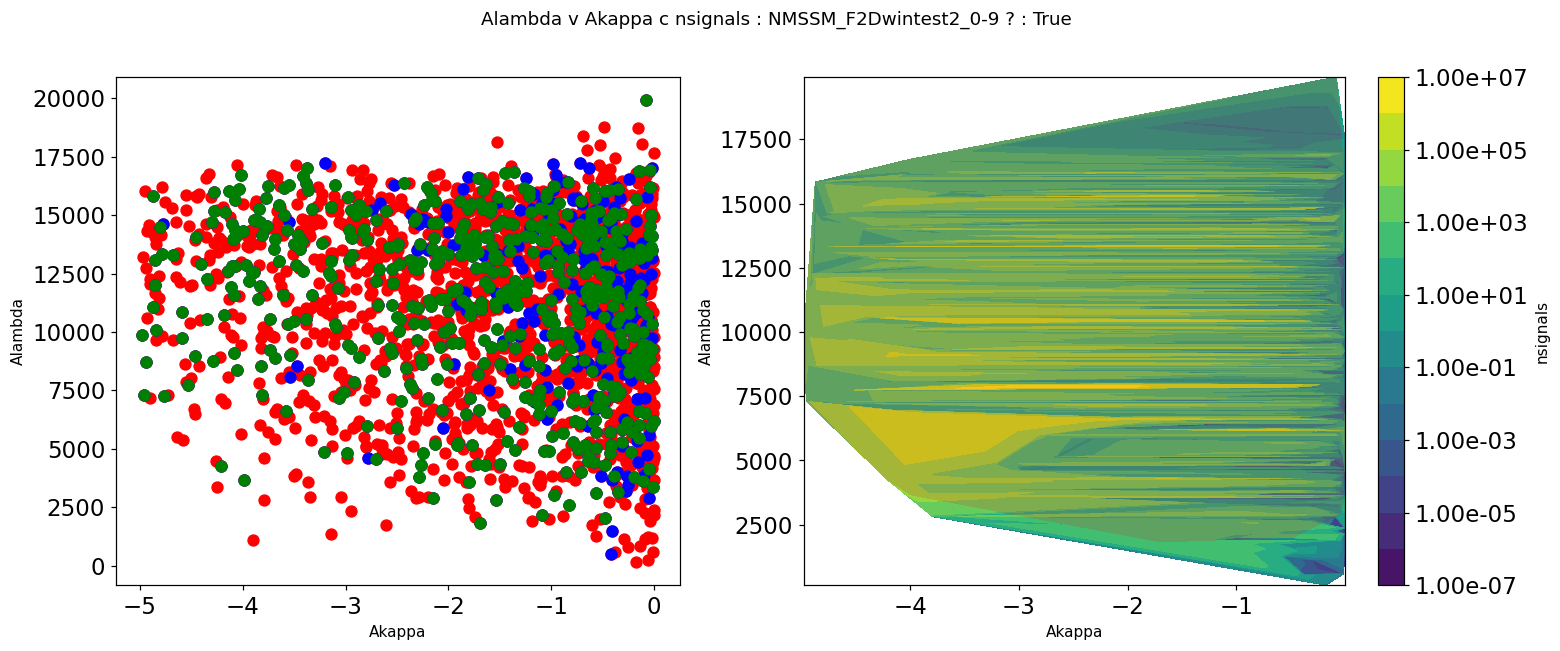

In [66]:
# %%time # FOR PLOTTING Z-LINES

condition = "True"# "3e-4<r[4] and r[4]<3e-3"
par_indices = [2,4,5,8,9]

# z_levels = [0,3e-3,3,3e3]
# z_colors = ["gray","cyan","blue","green"]

# z_levels = np.logspace(-7,7,15)
# z_colors = ["black","darkgray","gray","lightgray","lightblue","blue","cyan","red","magenta","orange","yellow","lime","green","brown","white"]
z_levels = [0,1,10]
z_colors = ["red","blue","green"]
 # boof        lo hi   counter   lo hi ctr ...etc.
# winandcounter=[[0,1e-308,0],[1e-308,1e-100,0],[1e-100,1e-50,0],[1e-50,1e-20,0],[1e-20,1e-7,0],[1e-7,1e-2,0],[1e-2,1,0],[1,10,0],[10,1e3,0],[1e3,1e99,0]]
# for nsig in things[0]:
#     for i,(lo,hi,_) in enumerate(winandcounter):
#         if lo<=nsig and nsig<hi: winandcounter[i][2]+=1
# print(len(things[0]),len(winandcounter))
# for r in winandcounter:
#     print(r)

for x in range(len(things)):
    if x not in par_indices: continue
    for y in range(len(things)):
        if y not in par_indices: continue
        if x>=y: continue
            
        if things[x][0]==things[x][-1]: continue # if the   x   param doesn't change over the run
        if things[y][0]==things[y][-1]: continue # if the   y   param doesn't change over the run                        
                    
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6),dpi=110,gridspec_kw={'width_ratios': [1, 1.2]}) # to keep code structure (i am lazy) but pull wider 2nd plot do [1,10]
        fig.suptitle(f"{names_of_things[y]} v {names_of_things[x]} c {names_of_things[0]} : " + configuration + " " + configuration_subtitle + " : " + condition,fontsize=12)

        x_arr = []
        y_arr = []
        nsig_arr = []
        for ir in range(len(things[0])):
            x_arr.append(things[x][ir])
            y_arr.append(things[y][ir])
            nsig_arr.append(things[0][ir])
            
        for iz,level in enumerate(z_levels):
            plot_x = [x for j,x in enumerate(x_arr) if nsig_arr[j]>level]
            plot_y = [y for j,y in enumerate(y_arr) if nsig_arr[j]>level]
            
            
                # LEFT SUBPLOT
            lplot = ax1.scatter(plot_x,plot_y,c=z_colors[iz],marker='.',s=200)

        low_cutoff=0
        n_levelticks=15 # (this is 1 more than the number of WINDOWS you'll have)
    ## THIS BLOCK CLEANS OUT THE 0=SIGNAL EVENTS
        low_cutoff=1e-7
        x_arr = []
        y_arr = []
        nsig_arr = []
        for ir in range(len(things[0])):
            if things[0][ir]>low_cutoff:
                x_arr.append(things[x][ir])
                y_arr.append(things[y][ir])
                nsig_arr.append(things[0][ir])
    ## END BLOCK
                # RIGHT SUBPLOT
            # rplot = ax2.plot(plot_x,plot_y,c=z_colors[iz],marker='.',lw=10)
            # equis,why = np.meshgrid(x_arr,y_arr)

        alt_levels = np.logspace(np.log10(min(min(nsig_arr),low_cutoff)),int(np.log10(max(nsig_arr)))+1,n_levelticks)
        
        rplot = ax2.tricontourf(x_arr,y_arr,nsig_arr,alt_levels,norm="log")#,vmin=1e-10,vmax=max(nsig_arr))#,z_levels)
        # routl = ax2.tricontour(x_arr,y_arr,nsig_arr,[3],colors="red")
        # routf = ax2.tricontourf(x_arr,y_arr,nsig_arr,[3,1e99],colors="red",alpha=.15)

        # again reset x,y,nsig to ONLY have teh things above 3 so no dipping BELOW, only above?
        x_arr = []
        y_arr = []
        nsig_arr = []
        for ir in range(len(things[0])):
            if things[0][ir]>=3:
                x_arr.append(things[x][ir])
                y_arr.append(things[y][ir])
                nsig_arr.append(things[0][ir])
        routl = ax2.tricontour(x_arr,y_arr,nsig_arr,[3],colors="red")
        routf = ax2.tricontourf(x_arr,y_arr,nsig_arr,[3,1e99],colors="red",alpha=.15)
        
        rcb = plt.colorbar(rplot, ax=ax2)
        rcb.set_label(label=names_of_things[0], fontsize=10)
        rcb.ax.set_yticklabels([f"{t:.2e}" for t in np.logspace(np.log10(min(min(nsig_arr),low_cutoff)),int(np.log10(max(nsig_arr)))+1,n_levelticks)])
        
        ax1.set_xlabel(names_of_things[x],fontsize=10)
        ax1.set_ylabel(names_of_things[y],fontsize=10)
        ax1.set_xscale(scales_of_things[x])
        ax1.set_yscale(scales_of_things[y])
        ax2.set_xlabel(names_of_things[x],fontsize=10)
        ax2.set_ylabel(names_of_things[y],fontsize=10)
        ax2.set_xscale(scales_of_things[x])
        ax2.set_yscale(scales_of_things[y])
        
        # x lims
        x_name = names_of_things[x]
        (MASS_MIN,MASS_MAX)=(.1,2)
        (TANB_MIN,TANB_MAX)=(2,50)
        if x_name=="nsignals":
            ax1.set_xlim(1e-10,1e7)
            ax2.set_xlim(1e-10,1e7)
        elif x_name=="mass":
            ax1.set_xlim(MASS_MIN,MASS_MAX)
            ax2.set_xlim(MASS_MIN,MASS_MAX)
        elif x_name=="tanb":
            ax1.set_xlim(TANB_MIN,TANB_MAX)
            ax2.set_xlim(TANB_MIN,TANB_MAX)
        elif x_name=="AL:AK": pass
        # y lims
        y_name = names_of_things[y]
        if y_name=="nsignals":
            ax1.set_ylim(1e-10,1e7)
            ax2.set_ylim(1e-10,1e7)
        elif y_name=="mass":
            ax1.set_ylim(MASS_MIN,MASS_MAX)
            ax2.set_ylim(MASS_MIN,MASS_MAX)
        elif y_name=="tanb":
            ax1.set_ylim(TANB_MIN,TANB_MAX)
            ax2.set_ylim(TANB_MIN,TANB_MAX)
        elif y_name=="AL:AK": pass

        plt.show()
        plt.close()


In [26]:
%%time
# conditions = ["True","r[0]>3","3e-4<r[4] and r[4]<3e-3",".1<r[1] and r[1]<.21",".21<r[1] and r[1]<.6",".6<r[1] and r[1]<1","1<r[1]",".4<r[1] and r[1]<.41"]
# conditions = ["True","r[0]>1e-100","r[0]>1e-10","r[0]>1e-1","r[0]>3e0","r[0]>1e3"]
# conditions = ["True","2<r[2] and r[2]<5","5<r[2] and r[2]<10","10<r[2] and r[2]<30","30<r[2]"]
conditions = ["True"]
#                 0              1          2      3     4     5       6
#         event ~ [nsignals    mass     tanb ALDOM/AKDOM kdl  mueff proplifetime   ...]
x = 1
y = 2
c = 0
for condition in conditions:
    x_arr = []
    y_arr = []
    x_arr2 = []
    y_arr2 = []
    c_arr = []
    for r in match_events:
        if eval(condition):
            x_arr.append(r[x])
            y_arr.append(r[y])
            c_arr.append(r[c])
            if r[0]>=3:
                x_arr2.append(r[x])
                y_arr2.append(r[y])              
                
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6),dpi=110)
    fig.suptitle(f"{names_of_things[y]} v {names_of_things[x]} c {names_of_things[c]} : " + configuration + " : " + condition,fontsize=12)

    if c==4: (cmin,cmax)=(1e-5,1e-2)
    elif c==1: (cmin,cmax)=(.1,4.5)
    else: (cmin,cmax)=(None,None)
        # LEFT SUBPLOT
    ax1.scatter(x_arr2,y_arr2,facecolors='none', edgecolors='k',s=30)
    if c!=0: lplot = ax1.scatter(x_arr,y_arr,c=c_arr,norm=scales_of_things[c],cmap="rainbow",marker='.',s=20,vmin=cmin,vmax=cmax) # TEMP structure to force
    else: lplot = ax1.scatter(x_arr,y_arr,c=c_arr,norm="linear",cmap="rainbow",marker='.',s=20,vmin=cmin,vmax=cmax)               #  nsignals to be linear on norm
        # RIGHT SUBPLOT
    if c!=0: rplot = ax2.scatter(x_arr,y_arr,c=c_arr,norm=scales_of_things[c],cmap="rainbow",marker='.',s=20,vmin=cmin,vmax=cmax) # TEMP structure to force
    else: rplot = ax2.scatter(x_arr,y_arr,c=c_arr,norm="linear",cmap="rainbow",marker='.',s=20,vmin=cmin,vmax=cmax)               #  nsignals to be linear on norm
    ax2.scatter(x_arr2,y_arr2,facecolors='none', edgecolors='k',s=30)
    
    lcb = plt.colorbar(lplot, ax=ax1)
    rcb = plt.colorbar(rplot, ax=ax2)
    lcb.set_label(label=names_of_things[c], fontsize=10)
    rcb.set_label(label=names_of_things[c], fontsize=10)
    
    ax1.set_xlabel(names_of_things[x],fontsize=10)
    ax1.set_ylabel(names_of_things[y],fontsize=10)
    ax1.set_xscale(scales_of_things[x])
    ax1.set_yscale(scales_of_things[y])
    ax2.set_xlabel(names_of_things[x],fontsize=10)
    ax2.set_ylabel(names_of_things[y],fontsize=10)
    ax2.set_xscale(scales_of_things[x])
    ax2.set_yscale(scales_of_things[y])
    
    # x lims
    x_name = names_of_things[x]
    if x_name=="nsignals":
        ax1.set_xlim(1e-10,1e7)
        ax2.set_xlim(1e-10,1e7)
    elif x_name=="mass":
        ax1.set_xlim(.1,4.5)
        ax2.set_xlim(.1,4.5)
    elif x_name=="tanb":
        ax1.set_xlim(2,50)
        ax2.set_xlim(2,50)
    elif x_name=="AL:AK":
        ax1.set_xlim(1e-5,1e3)
        ax2.set_xlim(1e-5,1e3)
    # y lims
    y_name = names_of_things[y]
    if y_name=="nsignals":
        ax1.set_ylim(1e-10,1e7)
        ax2.set_ylim(1e-10,1e7)
    elif y_name=="mass":
        ax1.set_ylim(.1,4.5)
        ax2.set_ylim(.1,4.5)
    elif y_name=="tanb":
        ax1.set_ylim(2,50)
        ax2.set_ylim(2,50)
    elif y_name=="AL:AK":
        ax1.set_ylim(1e-5,1e3)
        ax2.set_ylim(1e-5,1e3)
    
    plt.show()
    plt.close()
    
twobodyprod = lambda mass,coupling,Acomp : Acomp*(2.50061/4.3318*10.0*1.2384*(1 - 0.0493827*mass**2)*(-0.676852*1/coupling - 0.331225*pow((1/coupling),3))**2)
threebodyprod = lambda mass,_,Acomp : (Acomp)**2*(np.sqrt(1 - 0.22893248780934505*pow(mass,2))*(2.4921956740972477e-6 + 7.131806947234633e-7*pow(mass,2) - 4.898106921019186e-8*pow(mass,4)) + pow(mass,2)*(-1.711633667336312e-6 + 1.9592427684076741e-7*pow(mass,2) - 1.1213358029850934e-8*pow(mass,4))* np.log((2.09*(1 + np.sqrt(1 - 0.22893248780934505*pow(mass,2))))/mass))
br_array = []
br_array_3bd = []
for r in match_events:
    if eval(condition):# and r[0]>=3:
        br_array.append(twobodyprod(r[1],r[2], 1e-5))
        br_array_3bd.append(threebodyprod(r[1],0,1e-5))
plt.figure()
plt.scatter(x_arr, br_array)
plt.scatter(x_arr, br_array_3bd)
plt.xscale("log")
# plt.yscale("log")
plt.xlim(.1,4.5)
plt.show()

NameError: name 'match_events' is not defined

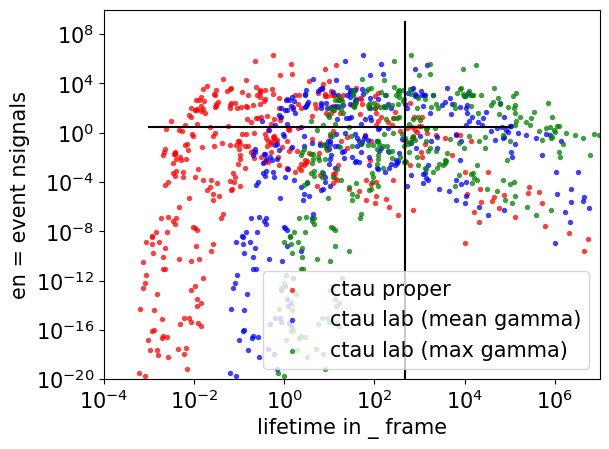

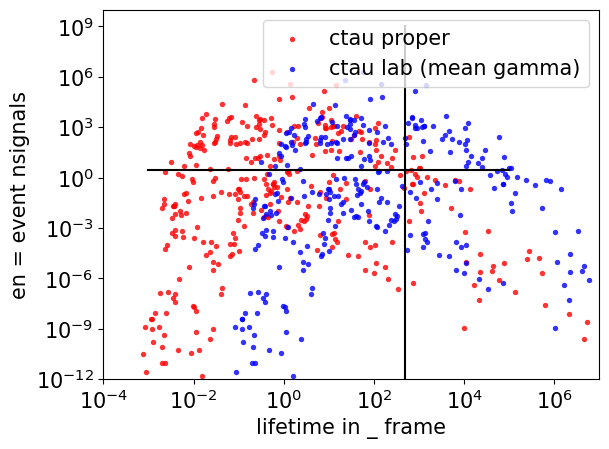

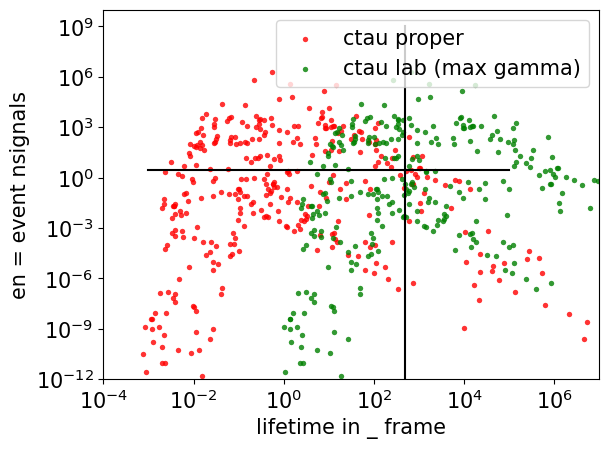

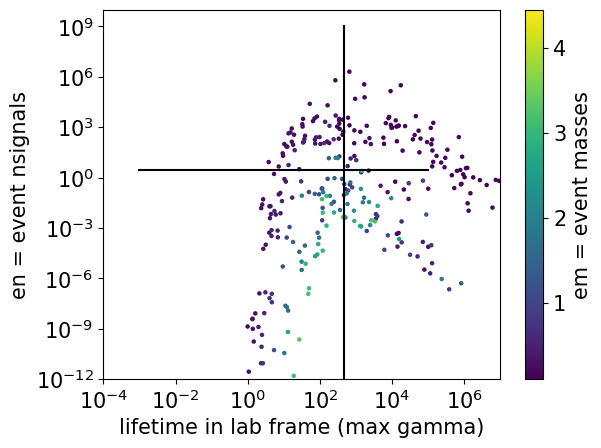

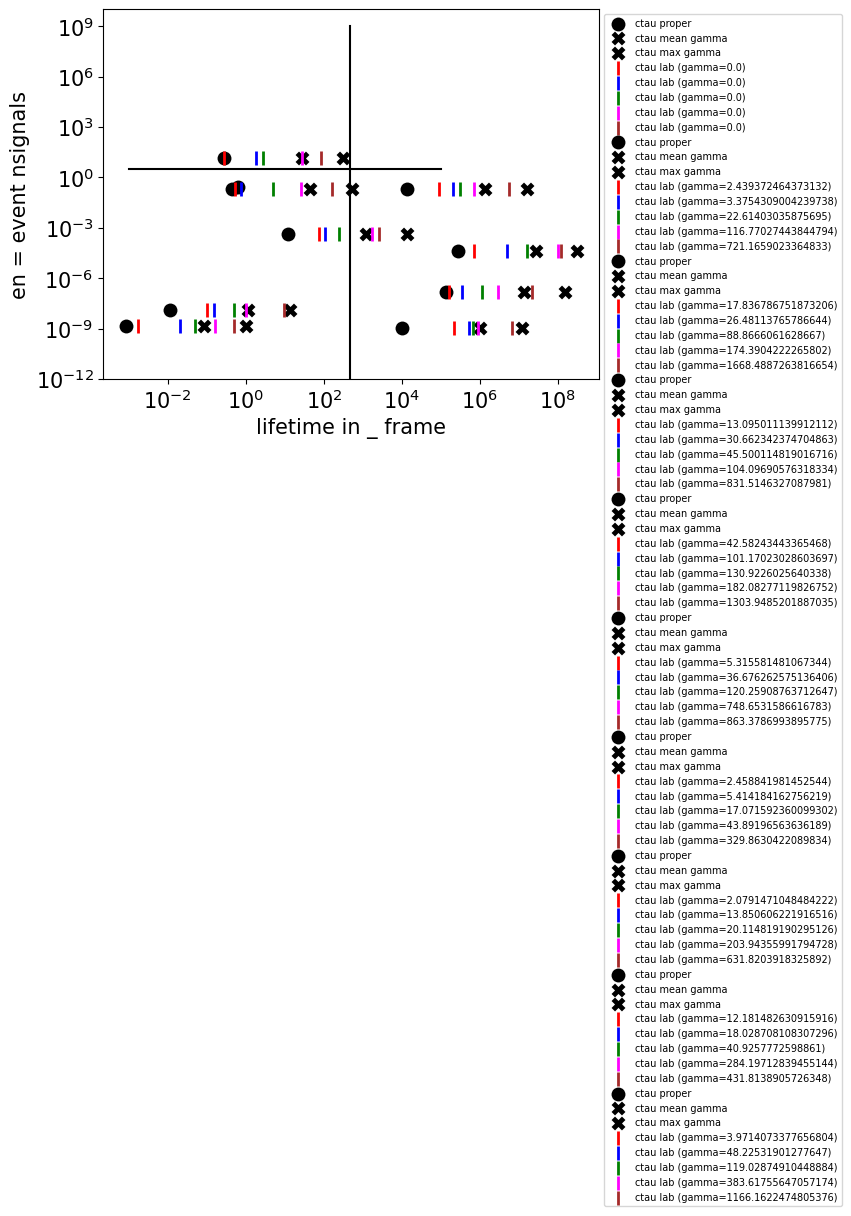

In [27]:
# sys.exit()
### startingloop=time.time()
associate_gammas = [[] for _ in use_these_indices[:NSAMP]]
for key in modes:
    for j,i in enumerate(use_these_indices[:NSAMP]):
        file_gammas=[]
        path=f"gammas/NMSSM_{key}_m_{event_masses[i]}_gammas.txt"
        DEBUG=(j%int(NSAMP/100)==0)
        try: # try load my gammas file
            # if DEBUG: print("load", path)
            if DEBUG: print(f"Loading {key} mode, m = {event_masses[i]} @ {time.time()-startingloop:.4f}")
            with open(path) as f:
                f_reader = csv.reader(f, delimiter=" ")
                for i,[r] in enumerate(f_reader):
                    file_gammas.append(float(r))
                f.close()
        except:
            if DEBUG: print("Warning: file ",path," not found")
            continue
        extra_gammas = [file_gammas[int(np.random.random()*len(file_gammas))] for _ in range(NEXTRAGAMS)]
        extra_gammas.sort()
        associate_gammas[j].append([np.mean(file_gammas),max(file_gammas)]+extra_gammas)
        # print(associate_gammas[j])
        
ecplist = [0 for _ in associate_gammas]
ecpplist = [0 for _ in associate_gammas]
ecxlist = [[0 for _i in range(NEXTRAGAMS)] for _j in associate_gammas]

cplabel="lifetime in lab frame (mean gamma)"
cpplabel="lifetime in lab frame (max gamma)"
cxlabel="lifetime in lab frame (specific gamma)"

for j,m_slice in enumerate(associate_gammas):
    for k_slice in m_slice:
        ecplist[j]+=k_slice[0]*eclist[j]/len(modes)
        ecpplist[j]+=k_slice[1]*eclist[j]/len(modes)
        for i in range(len(ecxlist[0])):
            ecxlist[j][i]+=k_slice[2+i]*eclist[j]/len(modes)

plt.figure()
plt.scatter(eclist,enlist,c="r",alpha=.75,s=15,lw=0,label="ctau proper")
plt.scatter(ecplist,enlist,c="b",alpha=.75,s=15,lw=0,label="ctau lab (mean gamma)")
plt.scatter(ecpplist,enlist,c="g",alpha=.75,s=15,lw=0,label="ctau lab (max gamma)")
plt.xlabel("lifetime in _ frame")
plt.ylabel("en = event nsignals")
plt.xlim(1e-4,1e7)
plt.ylim(1e-20,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.legend()
plt.show()
plt.close()

plt.figure()
plt.scatter(eclist,enlist,c="r",alpha=.8,s=15,lw=0,label="ctau proper")
plt.scatter(ecplist,enlist,c="b",alpha=.8,s=15,lw=0,label="ctau lab (mean gamma)")
plt.xlabel("lifetime in _ frame")
plt.ylabel("en = event nsignals")
plt.xlim(1e-4,1e7)
plt.ylim(1e-12,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.legend()
plt.show()
plt.close()

plt.figure()
plt.scatter(eclist,enlist,c="r",alpha=.8,s=15,lw=0,label="ctau proper")
plt.scatter(ecpplist,enlist,c="g",alpha=.8,s=15,lw=0,label="ctau lab (max gamma)")
plt.xlabel("lifetime in _ frame")
plt.ylabel("en = event nsignals")
plt.xlim(1e-4,1e7)
plt.ylim(1e-12,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.legend()
plt.show()
plt.close()
#////////////////////
plt.figure()
plt.scatter(ecpplist,enlist,c=emlist,norm="linear",cmap="viridis",s=5)
plt.colorbar(label=mlabel)
plt.xlabel(cpplabel)
plt.ylabel(nlabel)
plt.xlim(1e-4,1e7)
plt.ylim(1e-12,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.show()
plt.close()
#//////////////////// for only a few of the events, plot it and five (random picks) of its gamma values' effect

signal_events = [i for i,en in enumerate(enlist) if en>max(0,1e-12)]
rand_events = [signal_events[int(np.random.random()*len(signal_events))] for i in range(10)] #10 random signal events

# print(signal_events)
# print()
# print(rand_events)
# print()

colors = ["r","b","g","magenta","brown","yellow","teal","lightgray","darkgray","orange","pink"]
markers = ["|"]#["X","v","o","D"]
plt.figure()
for indexoftheindex,rand_event_index in enumerate(rand_events):
    # plt.figure()
    
    # print(rand_event_index,eclist[rand_event_index],enlist[rand_event_index])
    
    plt.scatter(eclist[rand_event_index],enlist[rand_event_index],c="k",alpha=1,s=100,lw=0,label="ctau proper")
    plt.scatter(ecplist[rand_event_index],enlist[rand_event_index],c="k",alpha=1,marker="X",s=100,lw=0,label="ctau mean gamma")
    plt.scatter(ecpplist[rand_event_index],enlist[rand_event_index],c="k",alpha=1,marker="X",s=100,lw=0,label="ctau max gamma")

    for ig,ecx in enumerate(ecxlist[rand_event_index]):
        relevant_gamma = ecx*len(modes)/eclist[rand_event_index]
        
        plt.scatter(ecx,
                    enlist[rand_event_index],
                    c=colors[ig%len(colors)],marker=markers[indexoftheindex%len(markers)],alpha=1,s=100,lw=2,label=f"ctau lab (gamma={relevant_gamma})")
        
    # plt.xlabel("lifetime in _ frame")
    # plt.ylabel("en = event nsignals")
    # # plt.xlim(1e-4,1e7)
    # plt.ylim(1e-12,1e10)
    # plt.xscale("log")
    # plt.yscale("log")
    # plt.plot((480,480),(MINNSIG,1e9),c="k")
    # plt.plot((1e-3,1e5),(3,3),c="k")
    # plt.legend(fontsize=7,loc='upper left', bbox_to_anchor=(1., 1., 0., 0.))
    # plt.show()
    # plt.close()
    
plt.xlabel("lifetime in _ frame")
plt.ylabel("en = event nsignals")
# plt.xlim(1e-4,1e7)
plt.ylim(1e-12,1e10)
plt.xscale("log")
plt.yscale("log")
plt.plot((480,480),(MINNSIG,1e9),c="k")
plt.plot((1e-3,1e5),(3,3),c="k")
plt.legend(fontsize=7,loc='upper left', bbox_to_anchor=(1., 1., 0., 0.))
plt.show()
plt.close()

In [28]:
plt.figure(figsize=(10,7))
# plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],color='k',s=20)
plt.scatter(emlist,ecplist,c=etlist,cmap="rainbow",s=2)
plt.colorbar(label="tanb")
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.title("mean lifetime v ma")
plt.yscale("log")
plt.ylabel("ecp")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)
# plt.show()
plt.close()

In [29]:
plt.figure(figsize=(10,7))
# plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],color='k',s=20)
plt.scatter(emlist,eclist,c=etlist,cmap="rainbow",s=2)
plt.colorbar(label="tanb")
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[c for i,c in enumerate(eclist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.title("proper lifetime v ma")
plt.yscale("log")
plt.ylabel("ec")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)
# plt.show()
plt.close()
plt.figure(figsize=(10,7))
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[c for i,c in enumerate(eclist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[c for i,c in enumerate(eclist) if enlist[i]>=3],c=[t for i,t in enumerate(etlist) if enlist[i]>=3],cmap="rainbow",s=20)
plt.colorbar(label="tanb")
plt.title("proper lifetime v ma")
plt.yscale("log")
plt.ylabel("ec")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)
# plt.show()
plt.close()

In [30]:
plt.figure(figsize=(10,7))
# plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],color='k',s=20)
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i]) for i,_ in enumerate(emlist)]
plt.scatter(emlist,ecplist,c=brvallist,cmap="rainbow",s=2)
plt.colorbar(label="brval b-kA")
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.title("mean lifetime v ma")
plt.yscale("log")
plt.ylabel("ecp")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)
plt.plot((.1,4.5),(480,480),'k')
# plt.show()
plt.close()
plt.figure(figsize=(10,7))
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i]) for i,_ in enumerate(emlist) if enlist[i]>=3]
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],c=brvallist,norm="log",cmap="rainbow",s=20,vmax=4e-4,vmin=1e-18)
plt.colorbar(label="brval b-kA")
plt.title("mean lifetime v ma")
plt.yscale("log")
plt.ylabel("ecp")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)
plt.plot((.1,4.5),(480,480),'k')
# plt.show()
plt.close()
plt.figure(figsize=(10,7))
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i]) for i,_ in enumerate(emlist) if enlist[i]<3]
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]<3],[cp for i,cp in enumerate(ecplist) if enlist[i]<3],c=brvallist,norm="log",cmap="rainbow",s=20,vmax=4e-4,vmin=1e-18)
plt.colorbar(label="brval b-kA")
plt.title("mean lifetime v ma")
plt.yscale("log")
plt.ylabel("ecp")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)

plt.plot((.1,4.5),(480,480),'k')

# plt.show()
plt.close()


TypeError: <lambda>() missing 1 required positional argument: 'mHpm'

<Figure size 1000x700 with 0 Axes>

In [29]:
plt.figure(figsize=(10,7))
# plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],color='k',s=20)
plt.scatter(emlist,ecplist,c=eAlist,cmap="rainbow",norm="log",s=2,vmax=1e-4,vmin=1e-16)
plt.colorbar(label="Acomp")
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.title("mean lifetime v ma")
plt.yscale("log")
plt.ylabel("ecp")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)
# plt.show()
plt.close()
plt.figure(figsize=(10,7))
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],c=[A for i,A in enumerate(eAlist) if enlist[i]>=3],norm="log",cmap="rainbow",s=20,vmax=1e-4,vmin=1e-16)
plt.colorbar(label="Acomp")
plt.title("mean lifetime v ma")
plt.yscale("log")
plt.ylabel("ecp")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)
# plt.show()
plt.close()
plt.figure(figsize=(10,7))
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]<3],[cp for i,cp in enumerate(ecplist) if enlist[i]<3],c=[A for i,A in enumerate(eAlist) if enlist[i]<3],norm="log",cmap="rainbow",s=20,vmax=1e-4,vmin=1e-16)
plt.colorbar(label="Acomp")
plt.title("mean lifetime v ma")
plt.yscale("log")
plt.ylabel("ecp")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-8,1e6)
# plt.show()
plt.close()


In [30]:
plt.figure(figsize=(10,7),dpi=100)
# plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],color='k',s=20)
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i]) for i,_ in enumerate(emlist)]
plt.scatter(emlist,brvallist,c=etlist,cmap="rainbow",s=2)
plt.colorbar(label="tanb")
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[b for i,b in enumerate(brvallist) if enlist[i]>=3],facecolors='none', edgecolors='k',s=30)
plt.title("br b-kA v ma")
plt.yscale("log")
plt.ylabel("b-kA")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-18,1e-4)


# plt.show()
# plt.close()
# plt.figure(figsize=(10,7))
prod_yarr = []
prods_n = []
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i]) for i,_ in enumerate(emlist)]
for i,m in enumerate(prods_m):
    for j,em in enumerate(emlist):
        if em==m:
            prods_n.append(enlist[j])
            prod_yarr.append(brvallist[j])
            break # because sometimes two events have identical mass, unsure how to fix this without upping resolution
# plt.scatter([m for i,m in enumerate(prods_m) if prods_n[i]>=3],[y for i,y in enumerate(prod_yarr) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='r')
plt.scatter([m for i,m in enumerate(prods_m) if prods_n[i]<3],[y for i,y in enumerate(prod_yarr) if prods_n[i]<3],s=30,facecolors='none', edgecolors='r')
plt.scatter([m for i,m in enumerate(prods_m) if prods_n[i]>=3],[y for i,y in enumerate(prod_yarr) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='lime')
plt.scatter([m for i,m in enumerate(prods_m)],prod_yarr, c=prods_r,norm="log", cmap="viridis",s=20)

plt.colorbar(label="prod rate (pb)")
plt.title("br b-kA v ma c prodn")
plt.yscale("log")
plt.ylabel("b-kA")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-18,1e-4)

# plt.show()
plt.close()
plt.figure(figsize=(10,7))
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i]) for i,_ in enumerate(emlist) if enlist[i]>=3]
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],brvallist,facecolors='none', edgecolors='k',s=30)
plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],brvallist,c=[m for i,m in enumerate(etlist) if enlist[i]>=3],cmap="rainbow",s=20)
plt.title("br b-kA v ma")
plt.yscale("log")
plt.ylabel("b-kA")
plt.xlabel("ma")
plt.xscale("log")
plt.xlim(.1,4.5)
plt.ylim(1e-18,1e-4)
plt.colorbar(label="tanb")
# plt.show()
plt.close()

In [31]:
# br , acomp , prodn
plt.figure(figsize=(10,7),dpi=100)
# plt.scatter([m for i,m in enumerate(emlist) if enlist[i]>=3],[cp for i,cp in enumerate(ecplist) if enlist[i]>=3],color='k',s=20)
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i]) for i,_ in enumerate(emlist)]

prod_yarr = []
prods_n = []
prods_A = []
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i]) for i,_ in enumerate(emlist)]
for i,m in enumerate(prods_m):
    for j,em in enumerate(emlist):
        if em==m:
            prods_n.append(enlist[j])
            prod_yarr.append(brvallist[j])
            prods_A.append(eAlist[j])
            break # because sometimes two events have identical mass, unsure how to fix this without upping resolution
# plt.scatter([m for i,m in enumerate(prods_m) if prods_n[i]>=3],[y for i,y in enumerate(prod_yarr) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='r')
# plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]<3],[y for i,y in enumerate(prod_yarr) if prods_n[i]<3],s=30,facecolors='none', edgecolors='r')

plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]<1e-9],[A for i,A in enumerate(prod_yarr) if prods_n[i]<1e-9],color="gray",s=20)
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>1e-9],[A for i,A in enumerate(prod_yarr) if prods_n[i]>1e-9], c=[A for i,A in enumerate(prods_r) if prods_n[i]>1e-9],norm="log", cmap="rainbow",s=20)
plt.colorbar(label="rate")

plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3],[y for i,y in enumerate(prod_yarr) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='k')

plt.title("br b-kA v A c r")
plt.yscale("log")
plt.ylabel("b-kA")
plt.xlabel("A")
plt.xscale("log")
# plt.xlim(.1,4.5)
# plt.ylim(1e-18,1e-4)

# plt.show()
plt.close()

In [24]:
%%time
# need to find something that is proportional to prodrate 
## BELOW RECOGNIZE THAT THE LLP SPECTRA, WEIGHTS, ARE USING REFERENCE ACOMP/MHPM ETC.
##   AND THAT THE WEIGHTS DONT REFLECT THIS, JUST NSIGNALS, SINCE NSIGNALS ~ WEIGHTS * SCALING * DISTFAC
##   HENCE THE PRODUCTION PLOT IS CONSTANT (RE THE /THETA^2 IN THE Y AXIS DESCRIPTION)

        # emlist.append(em)
        # etlist.append(et)
        # enlist.append(en)
        # eclist.append(ec)
        # eAlist.append(eA)
        # eHlist.append(eH)
        # eKList.append(eKL)
brvallist=[br_b_xsA(emlist[i],etlist[i],eAlist[i],eHlist[i]) for i,_ in enumerate(emlist)]

prods_br = []
prods_n = []
prods_A = []
prods_cp = []
prods_c = []
prods_t=[]
prods_H=[]
prods_rp=[] # prods r prime, adjusted for couplingfac (scaling of reference spectrum to specific event's values)
# for reference, couplingfac := model.get_production_scaling(key, mass, coup, coup_ref, Acomp, Acomp_ref,mHpm,mHpm_ref)
#                prob_decay := math.exp(-(self.distance-self.distance_prod)/dbar)-math.exp(-(self.distance+self.length-self.distance_prod)/dbar)
# nsignals[x] := weight_event * couplingfac * prob_decay * br
# prods_mu =[]

for i,m in enumerate(prods_m):
    for j,em in enumerate(emlist):
        if em==m:
            prods_n.append(enlist[j])
            prods_br.append(brvallist[j])
            prods_A.append(eAlist[j])
            # prods_cp.append(ecplist[j])
            prods_c.append(eclist[j])
            prods_t.append(etlist[j])
            prods_H.append(eHlist[j])

            # prods_mu.append(emulist[j])
            
            couplingfac = model.get_production_scaling("5", em, etlist[j], 1, eAlist[j], 1, eHlist[j], 500)
            
            prods_rp.append(prods_r[i] * couplingfac)

            break # because sometimes two events have identical mass, unsure how to fix this without upping resolution


CPU times: total: 1min 19s
Wall time: 1min 19s


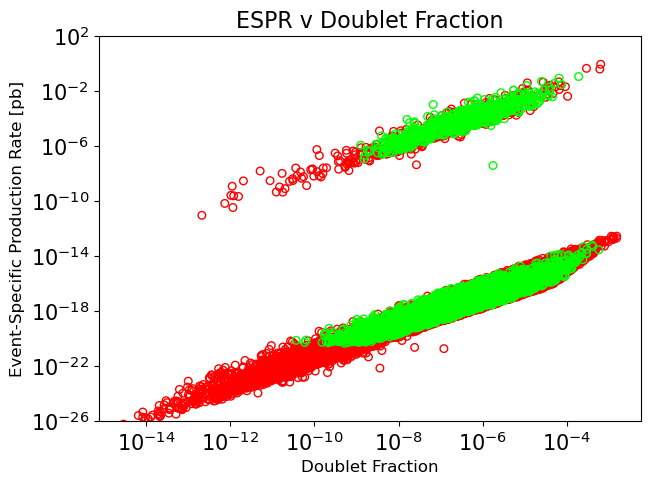

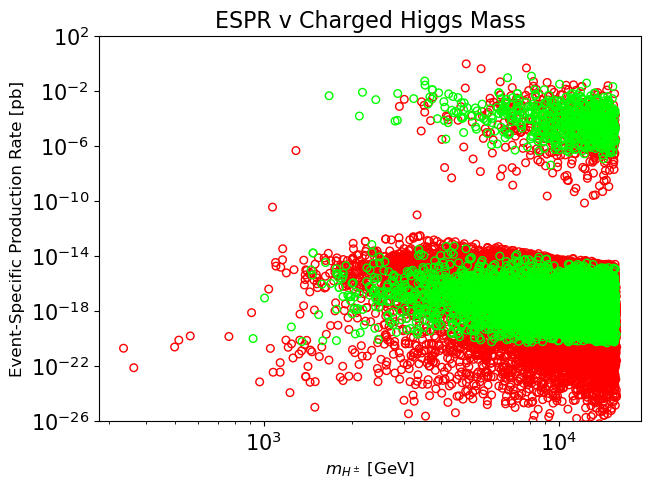

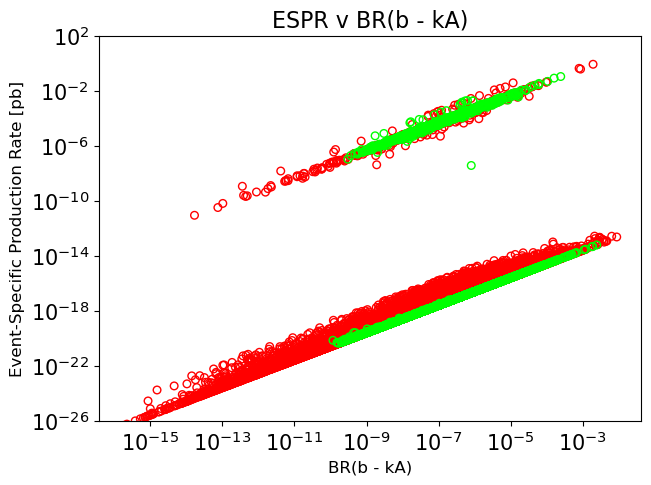

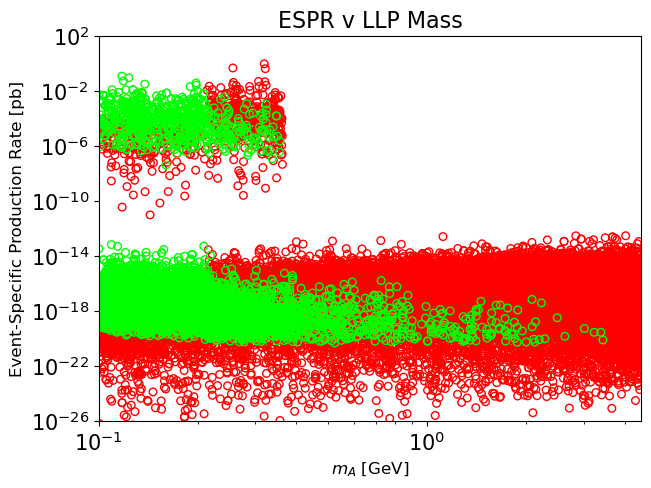

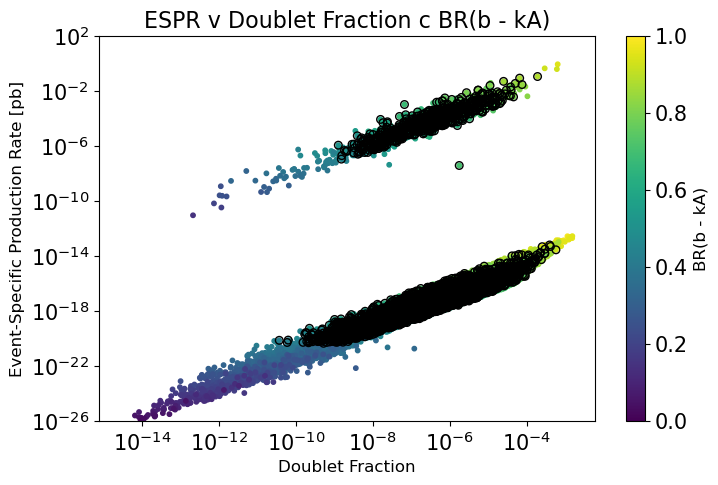

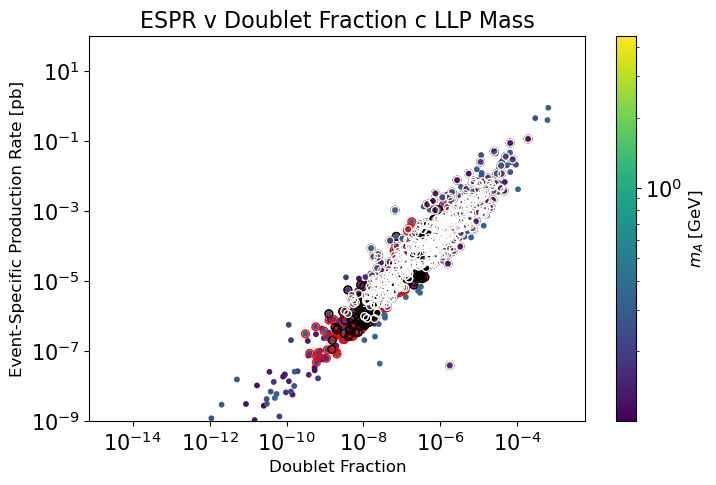

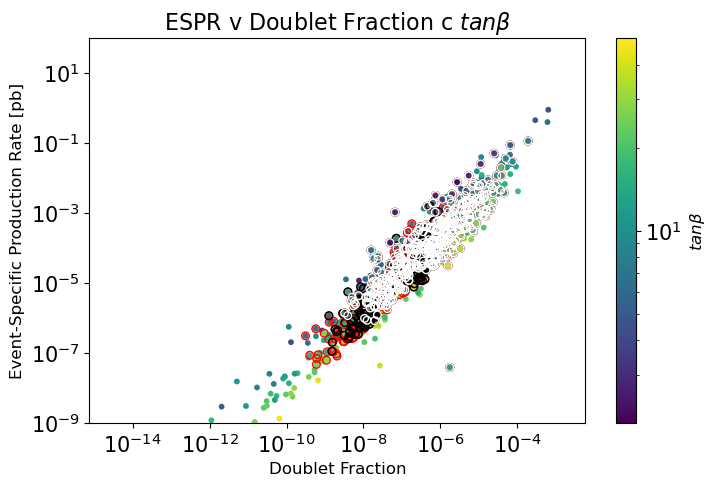

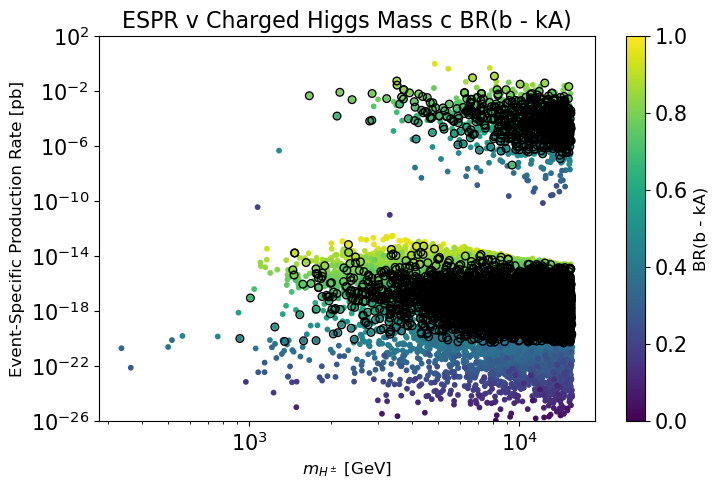

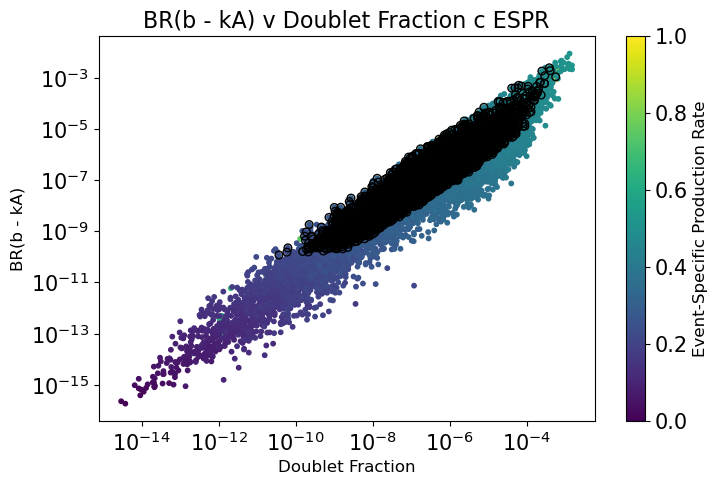

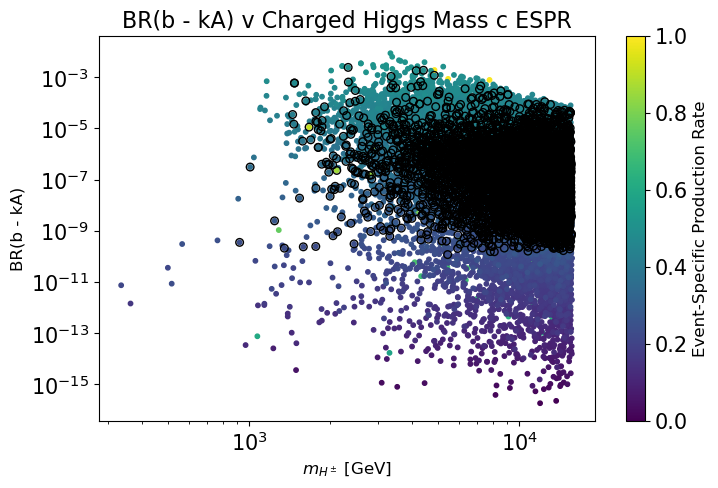

CPU times: total: 5.08 s
Wall time: 6.23 s


In [25]:
%%time
#=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====#
#                                CANDIDATE OUTLINING                                #
#=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====#
#                   PRODUCTION RATE                   #
#=====+=====+=====+=====+=====+=====+=====+=====+=====#
#   DOUBLET FRACTION    #
#=====+=====+=====+=====#
plt.figure(figsize=(7,5),dpi=100)     
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='lime')
# plt.scatter([A for i,A in enumerate(prods_m)],                                         prods_r,                        c=prods_br,norm="log", cmap="viridis",s=10)
# plt.colorbar(label="br")
plt.title("ESPR v Doublet Fraction",fontsize=16)
plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
plt.xlabel("Doublet Fraction",fontsize=12)
# plt.ylim(8e-11,1e6) # ylim for unadjusted prodrate
plt.ylim(1e-26,1e2)
# plt.xlim(1e-1,4.5e0)
plt.yscale("log")
plt.xscale("log")
plt.show()
plt.close()
#=====+=====+=====+=====#
#     CHARGED HIGGS     #
#=====+=====+=====+=====#
plt.figure(figsize=(7,5),dpi=100)     
plt.scatter([A for i,A in enumerate(prods_H) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_H) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='lime')
# plt.scatter([A for i,A in enumerate(prods_m)],                                         prods_r,                        c=prods_br,norm="log", cmap="viridis",s=10)
# plt.colorbar(label="br")
plt.title("ESPR v Charged Higgs Mass",fontsize=16)
plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
plt.xlabel(r"$m_{H^\pm}$ [GeV]",fontsize=12)
# plt.ylim(8e-11,1e6) # ylim for unadjusted prodrate
plt.ylim(1e-26,1e2)
# plt.xlim(1e-1,4.5e0)
plt.yscale("log")
plt.xscale("log")
plt.show()
plt.close()
#=====+=====+=====+=====#
#  BRANCHING FRACTION   #
#=====+=====+=====+=====#
plt.figure(figsize=(7,5),dpi=100)      
plt.scatter([A for i,A in enumerate(prods_br) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_br) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='lime')
# plt.scatter([A for i,A in enumerate(prods_m)],                                         prods_r,                        c=prods_br,norm="log", cmap="viridis",s=10)
# plt.colorbar(label="br")
plt.title("ESPR v BR(b - kA)",fontsize=16)
plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
plt.xlabel("BR(b - kA)",fontsize=12)
# plt.ylim(8e-11,1e6) # ylim for unadjusted prodrate
plt.ylim(1e-26,1e2)
# plt.xlim(1e-1,4.5e0)
plt.yscale("log")
plt.xscale("log")
plt.show()
plt.close()
#=====+=====+=====+=====#
#         MASS          #
#=====+=====+=====+=====#
plt.figure(figsize=(7,5),dpi=100)     
plt.scatter([A for i,A in enumerate(prods_m) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_m) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='lime')
# plt.scatter([A for i,A in enumerate(prods_m)],                                         prods_r,                        c=prods_br,norm="log", cmap="viridis",s=10)
# plt.colorbar(label="br")
plt.title("ESPR v LLP Mass",fontsize=16)
plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
plt.xlabel(r"$m_A$ [GeV]",fontsize=12)
# plt.ylim(8e-11,1e6) # ylim for unadjusted prodrate
plt.ylim(1e-26,1e2)
plt.xlim(1e-1,4.5e0)
plt.yscale("log")
plt.xscale("log")
plt.show()
plt.close()
# #=====+=====+=====+=====#
# #         MUEFF         #
# #=====+=====+=====+=====#
# plt.figure(figsize=(7,5),dpi=100)     
# plt.scatter([A for i,A in enumerate(prods_mu) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
# plt.scatter([A for i,A in enumerate(prods_mu) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='lime')
# # plt.scatter([A for i,A in enumerate(prods_m)],                                         prods_r,                        c=prods_br,norm="log", cmap="viridis",s=10)
# # plt.colorbar(label="br")
# plt.title(r"ESPR v $\mu_\text{eff}$",fontsize=16)
# plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
# plt.xlabel(r"$\mu_\text{eff}$ [GeV]",fontsize=12)
# # plt.ylim(8e-11,1e6) # ylim for unadjusted prodrate
# plt.ylim(1e-26,1e2)
# plt.xlim(400,1500)
# plt.yscale("log")
# plt.xscale("linear")
# plt.show()
# plt.close()



#=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====#
#                           HEATMAPS & CANDIDATE OUTLINING                          #
#=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====#
#                   PRODUCTION RATE                   #
#=====+=====+=====+=====+=====+=====+=====+=====+=====#
#   DOUBLET FRACTION    |  BRANCHING FRACTION   #
#=====+=====+=====+=====#=====+=====+=====+=====#
plt.figure(figsize=(8,5),dpi=100)     
# plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_A)],                                         prods_rp,                        c=prods_br,norm="log", cmap="viridis",s=10)
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='k')
cbar = plt.colorbar()
cbar.set_label(label="BR(b - kA)",size=12)
plt.title("ESPR v Doublet Fraction c BR(b - kA)",fontsize=16)
plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
plt.xlabel("Doublet Fraction",fontsize=12)
#       (8e-11,1e6) # ylim for unadjusted prodrate
plt.ylim(1e-26,1e2)
# plt.xlim()
plt.yscale("log")
plt.xscale("log")
plt.show()
plt.close()
#=====+=====+=====+=====#=====+=====+=====+=====#
#   DOUBLET FRACTION    |       LLP MASS        #
#=====+=====+=====+=====#=====+=====+=====+=====#
plt.figure(figsize=(8,5),dpi=100)     
# plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_A)],                                         prods_rp,                        c=prods_m,norm="log", cmap="viridis",s=10)
cbar = plt.colorbar()
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3e-1],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3e-1],s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='k')
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3e1],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3e1],s=30,facecolors='none', edgecolors='w')
cbar.set_label(label=r"$m_A$ [GeV]",size=12)
plt.title("ESPR v Doublet Fraction c LLP Mass",fontsize=16)
plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
plt.xlabel("Doublet Fraction",fontsize=12)
plt.yscale("log")
plt.xscale("log")
#       (8e-11,1e6) # ylim for unadjusted prodrate
# plt.ylim(1e-13,1e2)
# plt.show()
plt.ylim(1e-9,1e2)
plt.show()
# plt.ylim(1e-6,1e2)
# plt.show()
plt.close()
#=====+=====+=====+=====#=====+=====+=====+=====#
#   DOUBLET FRACTION    |         TANB          #
#=====+=====+=====+=====#=====+=====+=====+=====#
plt.figure(figsize=(8,5),dpi=100)     
# plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_A)],                                         prods_rp,                        c=prods_t,norm="log", cmap="viridis",s=10)
cbar = plt.colorbar()
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3e-1],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3e-1],s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='k')
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3e1],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3e1],s=30,facecolors='none', edgecolors='w')
cbar.set_label(label=r"$tan\beta$",size=12)
plt.title(r"ESPR v Doublet Fraction c $tan\beta$",fontsize=16)
plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
plt.xlabel("Doublet Fraction",fontsize=12)
plt.yscale("log")
plt.xscale("log")
#       (8e-11,1e6) # ylim for unadjusted prodrate
# plt.ylim(1e-13,1e2)
# plt.show()
plt.ylim(1e-9,1e2)
plt.show()
# plt.ylim(1e-6,1e2)
# plt.show()
plt.close()



#=====+=====+=====+=====#=====+=====+=====+=====#
#     CHARGED HIGGS     |  BRANCHING FRACTION   #
#=====+=====+=====+=====#=====+=====+=====+=====#
plt.figure(figsize=(8,5),dpi=100)     
# plt.scatter([A for i,A in enumerate(prods_H) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_H)],                                         prods_rp,                        c=prods_br,norm="log", cmap="viridis",s=10)
plt.scatter([A for i,A in enumerate(prods_H) if prods_n[i]>=3],[y for i,y in enumerate(prods_rp) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='k')
cbar = plt.colorbar()
cbar.set_label(label="BR(b - kA)",size=12)
plt.title("ESPR v Charged Higgs Mass c BR(b - kA)",fontsize=16)
plt.ylabel("Event-Specific Production Rate [pb]",fontsize=12)
plt.xlabel(r"$m_{H^\pm}$ [GeV]",fontsize=12)
#       (8e-11,1e6) # ylim for unadjusted prodrate
plt.ylim(1e-26,1e2)
# plt.xlim()
plt.yscale("log")
plt.xscale("log")
plt.show()
plt.close()
#=====+=====+=====+=====+=====+=====+=====+=====+=====#
#                 BRANCHING FRACTION                  #
#=====+=====+=====+=====+=====+=====+=====+=====+=====#
#   DOUBLET FRACTION    |    PRODUCTION RATE    #
#=====+=====+=====+=====#=====+=====+=====+=====#
plt.figure(figsize=(8,5),dpi=100)     
# plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_A)],                                         prods_br,                        c=prods_rp,norm="log", cmap="viridis",s=10)
plt.scatter([A for i,A in enumerate(prods_A) if prods_n[i]>=3],[y for i,y in enumerate(prods_br) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='k')
cbar = plt.colorbar()
cbar.set_label(label="Event-Specific Production Rate",size=12)
plt.title("BR(b - kA) v Doublet Fraction c ESPR",fontsize=16)
plt.ylabel("BR(b - kA)",fontsize=12)
plt.xlabel("Doublet Fraction",fontsize=12)
#       (8e-11,1e6) # ylim for unadjusted prodrate
# plt.ylim()
# plt.xlim()
plt.yscale("log")
plt.xscale("log")
plt.show()
plt.close()
#=====+=====+=====+=====#=====+=====+=====+=====#
#     CHARGED HIGGS     |    PRODUCTION RATE    #
#=====+=====+=====+=====#=====+=====+=====+=====#
plt.figure(figsize=(8,5),dpi=100)     
# plt.scatter([A for i,A in enumerate(prods_H) if prods_n[i]<3], [y for i,y in enumerate(prods_rp) if prods_n[i]<3], s=30,facecolors='none', edgecolors='r')
plt.scatter([A for i,A in enumerate(prods_H)],                                         prods_br,                        c=prods_rp,norm="log", cmap="viridis",s=10)
plt.scatter([A for i,A in enumerate(prods_H) if prods_n[i]>=3],[y for i,y in enumerate(prods_br) if prods_n[i]>=3],s=30,facecolors='none', edgecolors='k')
cbar = plt.colorbar()
cbar.set_label(label="Event-Specific Production Rate",size=12)
plt.title("BR(b - kA) v Charged Higgs Mass c ESPR",fontsize=16)
plt.ylabel("BR(b - kA)",fontsize=12)
plt.xlabel(r"$m_{H^\pm}$ [GeV]",fontsize=12)
#       (8e-11,1e6) # ylim for unadjusted prodrate
# plt.ylim()
# plt.xlim()
plt.yscale("log")
plt.xscale("log")
plt.show()
plt.close()